In [1]:
%load_ext memory_profiler
import numpy as np
import os
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import h5py
from scipy import integrate
import pandas as pd
import random
from scipy.signal import find_peaks
import qetpy as qp
# import sys
# sys.path.append("./")
from functions import *

In [2]:
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=16)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rc('figure', titlesize=16)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rc('figure.subplot', hspace=  0.4)
fs = 1/2e-9

templateEM_Tl,  TemplateEM_Tl = create_template(np.load(r'templates/Tl_template_pulses.npy'))
templateHAD_Tl,  TemplateHAD_Tl = create_template(np.load(r'templates/Tl_template_pulses_neutron.npy'))

templateEM_p,  TemplateEM_p = create_template(np.load(r'templates/pure_template_pulses.npy'))
templateHAD_p,  TemplateHAD_p = create_template(np.load(r'templates/pure_template_pulses_neutron.npy'))

fs =1/2e-9
# energy in [ADC] / energyfactor = energy in [MeV]
'''energyfactor_pure 6243
energyfactor_Tl 118252

longtime_pure 250
shorttime_pure 24

longtime_Tl 11000
shorttime_Tl 600'''
def Ecalibration (amp, ctype):
    if ctype == 'Tl':
        return amp/118252
    if ctype == 'pure':
        return amp/6243



/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
len_all_identifiers = 1159
len_identifiers_15min_beamOFF = 89
len_identifiers_15min_beamON = 1046
len_identifiers_2hours_beamOFF = 6
len_identifiers_2hours_beamON =18
len_all_identifiers_cosmics = 20

In [4]:
     
        
class variables():
    def var(self, File, ctype, examine):
        file = h5py.File(File)

        deltachi2 = file['Delta_chi2'][:]
        chi2_EM = file['chi2_withdelay_EM'][:]
        amppil_EM = file['amp_pileup_EM'][:]
        self.t0pil_EM = file['t0_pileup_EM'][:]
        chi2pil_EM = file['chi2_pileup_EM'][:]
        chi2_Had = file['chi2_withdelay_Had'][:]
        amppil_Had = file['amp_pileup_Had'][:]
        self.t0pil_Had = file['t0_pileup_Had'][:]
        chi2pil_Had = file['chi2_pileup_Had'][:]
        self.deltachi2 = file ['Delta_chi2'][:]

        gli= np.where(file['glitch'][:]==True)[0]
        clip= np.where(file['clipped'][:]==True)[0]
        pileup= np.where(file['pileup'][:]==True)[0]
        noisy= np.where(file['noisypulse'][:]==True)[0]
        self.select = np.unique(np.concatenate((gli,clip,pileup,noisy),0))
        if examine: 
            self.amp_EM_PS_removed = np.take(file ['amp_withdelay_EM'][:],self.select)
            self.t0_EM_PS_removed = np.take(file ['t0_withdelay_EM'][:],self.select)
        #     self.chi2_EM_PS_removed = np.take(file ['chi2_withdelay_EM'][:],self.select)
            self.amppil_EM_PS_removed = np.take(file['amp_pileup_EM'][:], self.select)
            self.t0pil_EM_PS_removed = np.take(file['t0_pileup_EM'][:], self.select)
        #     self.chi2pil_EM_PS_removed = np.take(file['chi2_pileup_EM'][:], self.select)    
            self.amp_Had_PS_removed = np.take(file ['amp_withdelay_Had'][:],self.select)
            self.t0_Had_PS_removed = np.take(file ['t0_withdelay_Had'][:],self.select)
            self.chi2_Had_PS_removed = np.take(file ['chi2_withdelay_Had'][:],self.select)
            self.amppil_Had_PS_removed = np.take(file['amp_pileup_Had'][:], self.select)
            self.t0pil_Had_PS_removed = np.take(file['t0_pileup_Had'][:], self.select)
            self.chi2pil_Had_PS_removed = np.take(file['chi2_pileup_Had'][:], self.select)
            self.integrated_raw_PS_removed = np.take(np.array(file ['integrated_raw_amp']), self.select)
            self.Energy_MK_PS_removed = np.take(np.array(file ['Energy_MK']), self.select)    
            self.deltachi2_PS_removed = np.take(np.array(file ['Delta_chi2']), self.select)
            self.CR_PS_removed = np.take(np.array(file ['charge_ratio']), self.select)
            self.CR100_PS_removed = np.take(np.array(file ['charge_ratio100']), self.select)
            self.rundata_PS_removed = np.take(file['rundata'][:],self.select)
            self.waveform_number_PS_removed = np.take(file['waveform_number'][:],self.select)
            self.data_min_PS_removed = np.take(file['data_amp_min'][:],self.select)

        self.amp_EM_PS = np.delete(file ['amp_withdelay_EM'][:],self.select)
        self.t0_EM_PS = np.delete(file ['t0_withdelay_EM'][:],self.select)
        self.chi2_EM_PS = np.delete(file ['chi2_withdelay_EM'][:],self.select)
        self.amppil_EM_PS = np.delete(file['amp_pileup_EM'][:], self.select)
        self.t0pil_EM_PS = np.delete(file['t0_pileup_EM'][:], self.select)
        self.chi2pil_EM_PS = np.delete(file['chi2_pileup_EM'][:], self.select)    
        self.amp_Had_PS = np.delete(file ['amp_withdelay_Had'][:],self.select)
        self.t0_Had_PS = np.delete(file ['t0_withdelay_Had'][:],self.select)
        self.chi2_Had_PS = np.delete(file ['chi2_withdelay_Had'][:],self.select)
        self.amppil_Had_PS = np.delete(file['amp_pileup_Had'][:], self.select)
        self.t0pil_Had_PS = np.delete(file['t0_pileup_Had'][:], self.select)
        self.chi2pil_Had_PS = np.delete(file['chi2_pileup_Had'][:], self.select)
        self.integrated_raw_PS = np.delete(np.array(file ['integrated_raw_amp']), self.select)    
        self.Energy_MK_PS = np.delete(np.array(file ['Energy_MK']), self.select)    
        self.deltachi2_PS = np.delete(np.array(file ['Delta_chi2']), self.select)
        self.CR_PS = np.delete(np.array(file ['charge_ratio']), self.select)
        self.CR100_PS = np.delete(np.array(file ['charge_ratio100']), self.select)
        self.rundata_PS = np.delete(file['rundata'][:],self.select)
        self.waveform_number_PS = np.delete(file['waveform_number'][:],self.select)
        self.data_min_PS = np.delete(file['data_amp_min'][:],self.select)

        if ctype == 'Tl' :            
            select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (abs(amppil_EM[i] )>1000 and abs(self.t0pil_EM[i]*fs )>100 ) or (abs(amppil_EM[i] )>200 and abs(self.t0pil_EM[i]*fs )>1800 )]
            select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] )>700 and abs(self.t0pil_Had[i]*fs )>700 ) or (abs(amppil_Had[i] )>200 and abs(self.t0pil_Had[i]*fs )>1800 )]
            select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and abs(amppil_EM[i] )>20 and self.t0pil_EM[i]*fs <0]
            select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and abs(amppil_Had[i] )>20 and self.t0pil_Had[i]*fs <0]
            select8 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and (chi2pil_EM[i] > 3.5e7 or chi2_EM[i]/15000>3000) ]
            select9 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (chi2pil_Had[i] > 3.5e7 or chi2_Had[i]/15000>3000) ]
            self.select_FT = list(set(list(self.select)+ select2+select3+select8+select9+ select6+select7))
            self.select_FTonly = list(set( select2+select3+ select6+select7+select8+select9))

        if ctype == 'pure':
            select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (abs(amppil_EM[i]) > 150 and  abs(self.t0pil_EM[i]*fs) > 180)]
            select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] ) > 150 and abs(self.t0pil_Had[i]*fs) > 180)]
            select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and (abs(amppil_EM[i] )>30 and self.t0pil_EM[i]*fs <-20) or (abs(amppil_EM[i] )>50 and self.t0pil_EM[i]*fs <-10)]
            select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] )>30 and self.t0pil_Had[i]*fs <-20) or (abs(amppil_Had[i] )>50 and self.t0pil_Had[i]*fs <-10)]
            self.select_FT = list(set(list(self.select)+ select3+select2+ select6+select7))
            self.select_FTonly = list(set(select3+select2+ select6+select7))

        if examine: 
            self.amp_EM_PS_FT_removed = np.take(file ['amp_withdelay_EM'][:],self.select_FT)
            self.t0_EM_PS_FT_removed = np.take(file ['t0_withdelay_EM'][:],self.select_FT)
            self.chi2_EM_PS_FT_removed = np.take(file ['chi2_withdelay_EM'][:],self.select_FT)
            self.amppil_EM_PS_FT_removed = np.take(file['amp_pileup_EM'][:], self.select_FT)
            self.t0pil_EM_PS_FT_removed = np.take(file['t0_pileup_EM'][:], self.select_FT)
            self.chi2pil_EM_PS_FT_removed = np.take(file['chi2_pileup_EM'][:], self.select_FT)    
            self.amp_Had_PS_FT_removed = np.take(file ['amp_withdelay_Had'][:],self.select_FT)
            self.t0_Had_PS_FT_removed = np.take(file ['t0_withdelay_Had'][:],self.select_FT)
            self.chi2_Had_PS_FT_removed = np.take(file ['chi2_withdelay_Had'][:],self.select_FT)
            self.amppil_Had_PS_FT_removed = np.take(file['amp_pileup_Had'][:], self.select_FT)
            self.t0pil_Had_PS_FT_removed = np.take(file['t0_pileup_Had'][:], self.select_FT)
            self.chi2pil_Had_PS_FT_removed = np.take(file['chi2_pileup_Had'][:], self.select_FT)
            self.integrated_raw_PS_FT_removed = np.take(np.array(file ['integrated_raw_amp']), self.select_FT)
            self.Energy_MK_PS_FT_removed = np.take(np.array(file ['Energy_MK']), self.select_FT)    
            self.deltachi2_PS_FT_removed = np.take(np.array(file ['Delta_chi2']), self.select_FT)
            self.CR_PS_FT_removed = np.take(np.array(file ['charge_ratio']), self.select_FT)
            self.CR100_PS_FT_removed = np.take(np.array(file ['charge_ratio100']), self.select_FT)
            self.rundata_PS_FT_removed = np.take(file['rundata'][:],self.select_FT)
            self.waveform_number_PS_FT_removed = np.take(file['waveform_number'][:],self.select_FT)
            self.data_min_PS_FT_removed = np.take(file['data_amp_min'][:],self.select_FT)

        self.amp_EM_PS_FT = np.delete(file ['amp_withdelay_EM'][:],self.select_FT)
        self.t0_EM_PS_FT = np.delete(file ['t0_withdelay_EM'][:],self.select_FT)
        self.chi2_EM_PS_FT = np.delete(file ['chi2_withdelay_EM'][:],self.select_FT)
        self.amppil_EM_PS_FT = np.delete(file['amp_pileup_EM'][:], self.select_FT)
        self.t0pil_EM_PS_FT = np.delete(file['t0_pileup_EM'][:], self.select_FT)
        self.chi2pil_EM_PS_FT = np.delete(file['chi2_pileup_EM'][:], self.select_FT)    
        self.amp_Had_PS_FT = np.delete(file ['amp_withdelay_Had'][:],self.select_FT)
        self.t0_Had_PS_FT = np.delete(file ['t0_withdelay_Had'][:],self.select_FT)
        self.chi2_Had_PS_FT = np.delete(file ['chi2_withdelay_Had'][:],self.select_FT)
        self.amppil_Had_PS_FT = np.delete(file['amp_pileup_Had'][:], self.select_FT)
        self.t0pil_Had_PS_FT = np.delete(file['t0_pileup_Had'][:], self.select_FT)
        self.chi2pil_Had_PS_FT = np.delete(file['chi2_pileup_Had'][:], self.select_FT)
        self.integrated_raw_PS_FT = np.delete(np.array(file ['integrated_raw_amp']), self.select_FT)  
        self.Energy_MK_PS_FT = np.delete(np.array(file ['Energy_MK']), self.select_FT)    
        self.deltachi2_PS_FT = np.delete(np.array(file ['Delta_chi2']), self.select_FT)
        self.CR_PS_FT = np.delete(np.array(file ['charge_ratio']), self.select_FT)
        self.CR100_PS_FT = np.delete(np.array(file ['charge_ratio100']), self.select_FT)
        self.rundata_PS_FT = np.delete(file['rundata'][:],self.select_FT)
        self.waveform_number_PS_FT = np.delete(file['waveform_number'][:],self.select_FT)
        self.data_min_PS_FT = np.delete(file['data_amp_min'][:],self.select_FT)

        select2 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]>0 and  (abs(self.amppil_EM_PS[i]) > 150 and  abs(self.t0pil_EM_PS[i]*fs) > 180)]
        select3 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]<0 and (abs(self.amppil_Had_PS[i] ) > 150 and abs(self.t0pil_Had_PS[i]*fs) > 180)]
        select6 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]>0 and (abs(self.amppil_EM_PS[i] )>30 and self.t0pil_EM_PS[i]*fs <-20) or (abs(self.amppil_EM_PS[i] )>50 and self.t0pil_EM_PS[i]*fs <-10)]
        select7 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]<0 and (abs(self.amppil_Had_PS[i] )>30 and self.t0pil_Had_PS[i]*fs <-20) or (abs(self.amppil_Had_PS[i] )>50 and self.t0pil_Had_PS[i]*fs <-10)]
        self.select_FTonly = list(set(select3+select2+ select6+select7))
        print(len(select2), len(select3), len(select6), len(select7))
        print(len(list(set(select2+ select6))), len(list(set(select3+select7))))

        self.deltachi2_FT_removed = np.take(self.deltachi2_PS, self.select_FTonly)
        self.t0pil_Had_FT_removed = np.take(self.t0pil_Had_PS, self.select_FTonly)
        self.CR_FT_removed = np.take(self.CR_PS, self.select_FTonly)
        self.CR100_FT_removed = np.take(self.CR100_PS, self.select_FTonly)
        self.t0pil_EM_FT_removed = np.take(self.t0pil_EM_PS, self.select_FTonly)
        self.amppil_Had_FT_removed = np.take(self.amppil_Had_PS, self.select_FTonly)
        self.amppil_EM_FT_removed = np.take(self.amppil_EM_PS, self.select_FTonly)
        self.waveform_number_FT_removed = np.take(self.waveform_number_PS, self.select_FTonly)
        self.rundata_FT_removed = np.take(self.rundata_PS, self.select_FTonly)
        self.amp_Had_FT_removed = np.take(self.amp_Had_PS, self.select_FTonly)
        self.amp_EM_FT_removed = np.take(self.amp_EM_PS, self.select_FTonly)
        self.t0_Had_FT_removed = np.take(self.t0_Had_PS, self.select_FTonly)
        self.t0_EM_FT_removed = np.take(self.t0_EM_PS, self.select_FTonly)


In [26]:
%%time
file = 'saved_outputs/pure_XFEL_beamON.hdf5'
pure =variables()
pure.var(File = file, ctype = 'pure', examine = True)

72804 223125 147338 186887
186892 306942
CPU times: user 44.6 s, sys: 4.28 s, total: 48.9 s
Wall time: 51.6 s


In [6]:
print('all', 7163151)
print(len(pure.select) )
print(len(pure.select_FT) )
print(len(pure.select_FTonly) )
print(len(pure.amp_EM_PS_FT) )

all 7163151
1778996
2194594
415598
4968557


In [30]:
print('all', 7163151)
print(len(pure.select) )
print(len(pure.select_FT) )
print(len(pure.select_FTonly) )
print(len(pure.amp_EM_PS_FT) )

all 7163151
1778996
2185183
406187
4977968


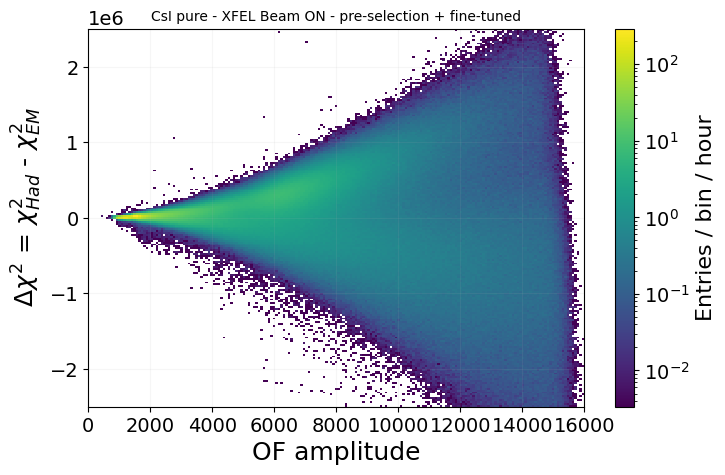

peak memory: 4587.86 MiB, increment: 186.16 MiB


In [38]:
%%memit

plt.figure(figsize=(8, 5))
w = np.ones_like(pure.deltachi2_PS_FT)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(pure.amp_EM_PS_FT , pure.deltachi2_PS_FT ,bins=(np.linspace(0,16000,200),np.linspace(-0.25e7, 0.25e7, 200)), weights = w, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
plt.grid(alpha=0.1)
plt.title('CsI pure - XFEL Beam ON - pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()

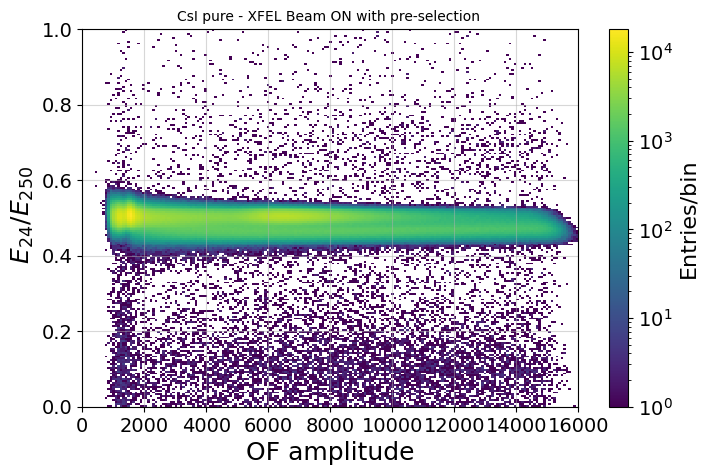

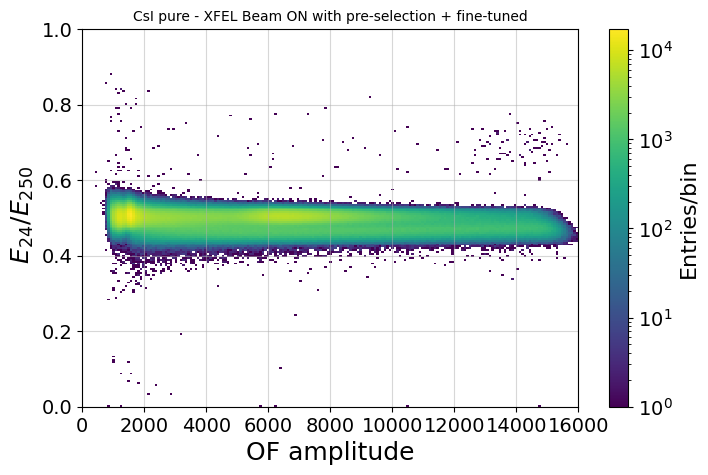

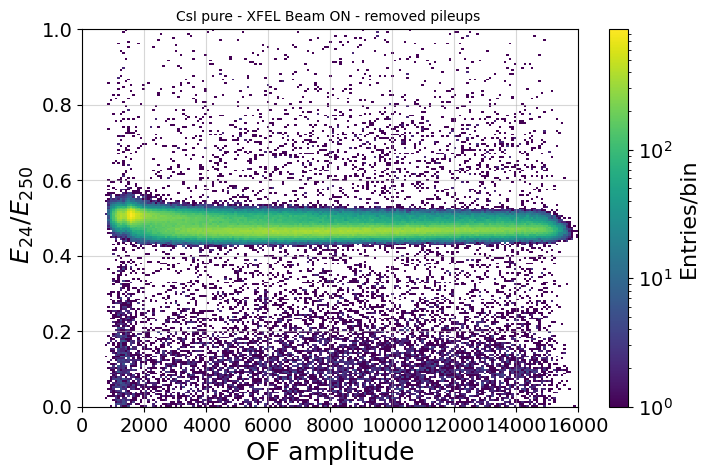

peak memory: 4347.68 MiB, increment: 189.71 MiB


In [7]:
%%memit
plt.figure(figsize=(8, 5))
plt.hist2d(pure.amp_EM_PS , pure.CR_PS ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{24}/E_{250}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist2d(pure.amp_EM_PS_FT , pure.CR_PS_FT ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{24}/E_{250}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist2d(pure.amp_EM_FT_removed , pure.CR_FT_removed ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{24}/E_{250}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON - removed pileups ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()


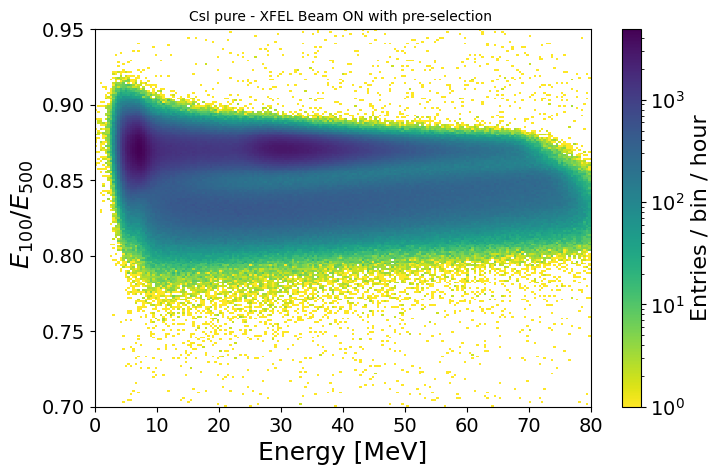

In [27]:
'''E_PS = Ecalibration(pure.integrated_raw_PS, 'pure')
plt.figure(figsize=(8, 5))
w = np.ones_like(pure.CR100_PS)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E_PS , pure.CR100_PS ,bins=(np.linspace(0,80,200), np.linspace(0.85,1,200)), cmap='viridis_r', cmin=1, norm=LogNorm())
plt.xlabel(r'Energy [MeV]',fontsize=18)
plt.ylabel(r' $E_{100}/E_{500}$',fontsize=18)
# plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()'''

E_ = Ecalibration(pure.Energy_MK_PS, 'pure')
plt.figure(figsize=(8, 5))
w = np.ones_like(pure.CR100_PS)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E_ , pure.CR100_PS ,bins=(np.linspace(0,80,200), np.linspace(0.7,0.95,200)), cmap='viridis_r', cmin=1, norm=LogNorm())
plt.xlabel(r'Energy [MeV]',fontsize=18)
plt.ylabel(r' $E_{100}/E_{500}$',fontsize=18)
# plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()
# plt.figure(figsize=(8, 5))
# plt.hist2d(pure.amp_EM_PS_FT , pure.CR100_PS_FT ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
# plt.xlabel(r'OF amplitude',fontsize=18)
# plt.ylabel(r' $E_{100}/E_{500}$',fontsize=18)
# plt.grid(alpha=0.5)
# plt.title('CsI pure - XFEL Beam ON with pre-selection + fine-tuned',fontsize=10)
# cbar = plt.colorbar()
# cbar.set_label('Entries/bin')
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.hist2d(pure.amp_EM_FT_removed , pure.CR100_FT_removed ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
# plt.xlabel(r'OF amplitude',fontsize=18)
# plt.ylabel(r' $E_{100}/E_{500}$',fontsize=18)
# plt.grid(alpha=0.5)
# plt.title('CsI pure - XFEL Beam ON - removed pileups ',fontsize=10)
# cbar = plt.colorbar()
# cbar.set_label('Entries/bin')
# plt.show()


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


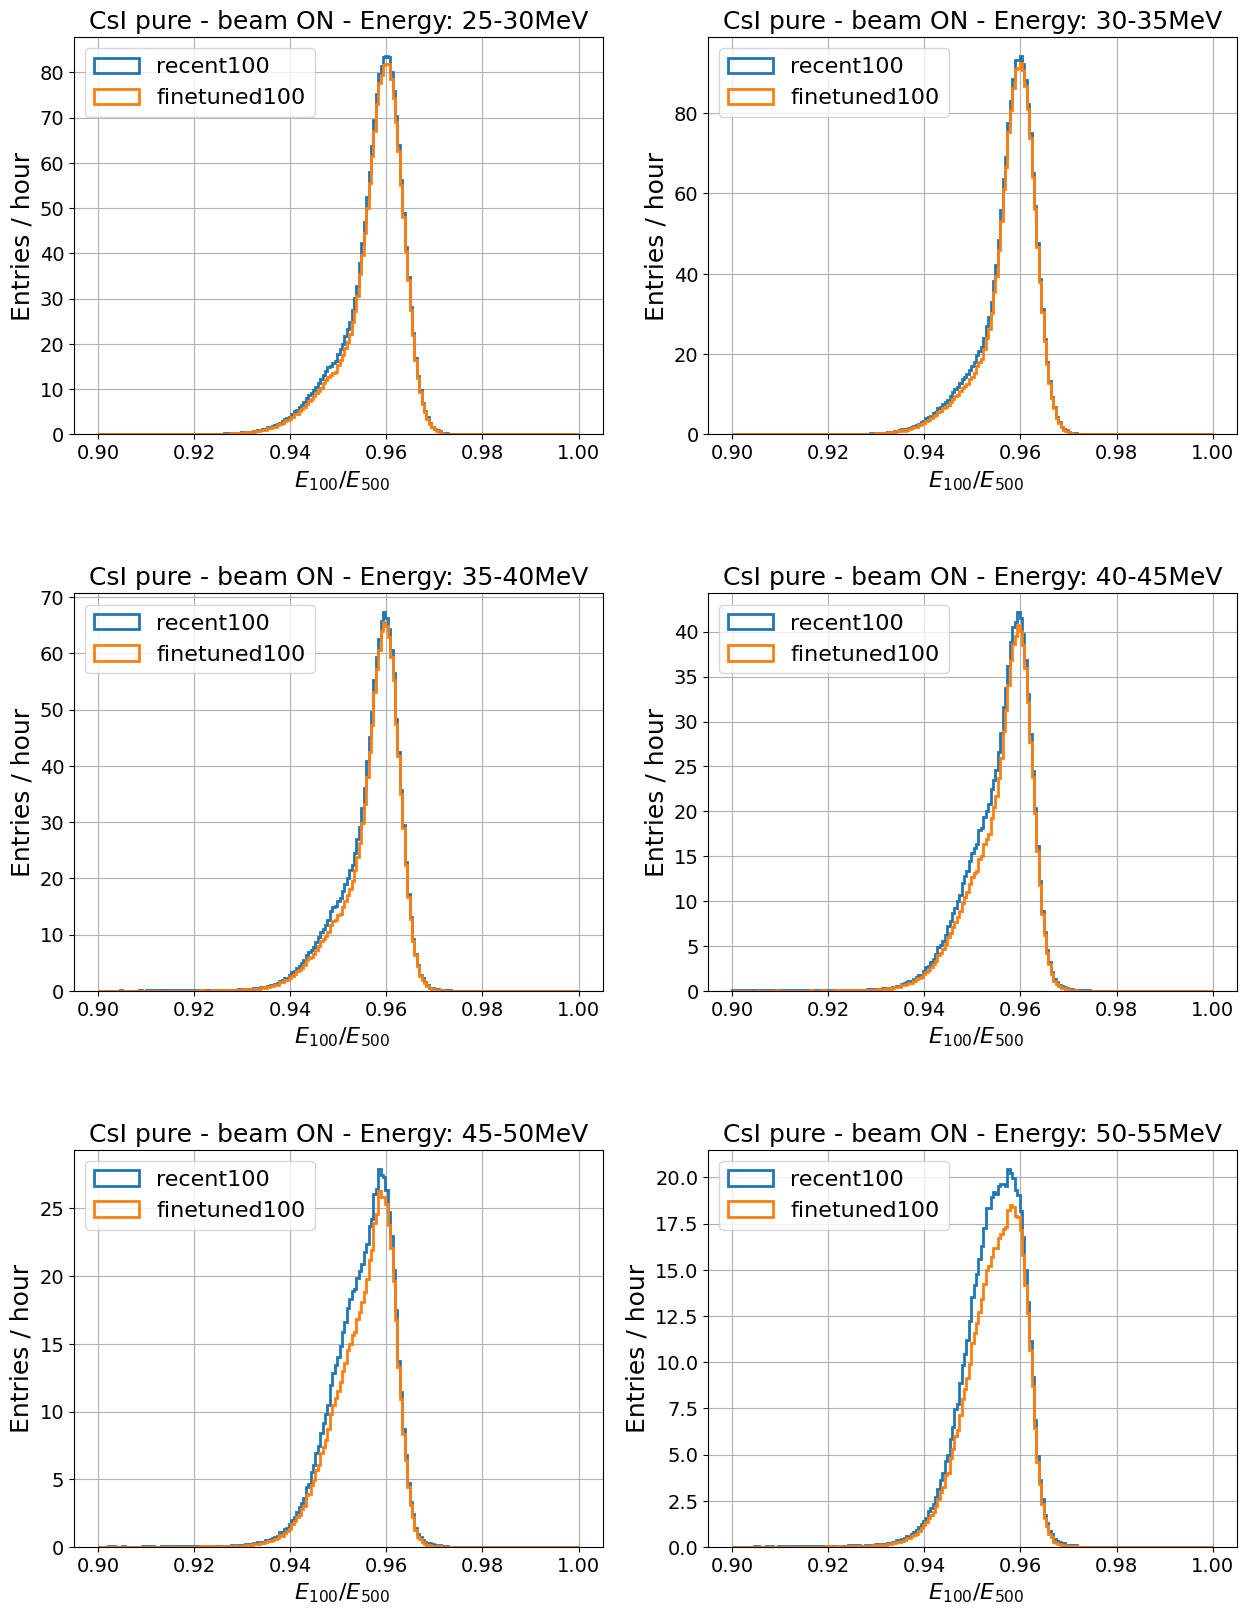

In [35]:


E_PS = Ecalibration(pure.integrated_raw_PS, 'pure')
E_PS_FT = Ecalibration(pure.integrated_raw_PS_FT, 'pure')

slices=np.arange(25,60,5)
fig, ax = plt.subplots(3, 2, figsize=(15,20))
ax = ax.flatten()
for i, s in enumerate(slices):
    if i != 6:
        bins = np.linspace(0.9, 1,200)
        sl = [i for i, x in enumerate(E_PS)  if x>s and x<s+5]
        w = np.ones_like(np.take(pure.CR100_PS,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.CR100_PS,sl), bins =bins, weights = w , histtype = 'step', linewidth = 2, label = 'recent100')
        sl = [i for i, x in enumerate(E_PS_FT)  if x>s and x<s+5]
        w = np.ones_like(np.take(pure.CR100_PS_FT,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.CR100_PS_FT,sl), bins =bins, weights = w , histtype = 'step', linewidth = 2, label = 'finetuned100')
        ax[i].set_title('CsI pure - beam ON - Energy: '+str(s)+'-'+str(s+5)+'MeV',fontsize =18)
        ax[i].set_xlabel(r' $E_{100}/E_{500}$')        
        ax[i].set_ylabel('Entries / hour',fontsize =18)
        ax[i].grid()
        ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax[i].legend(loc = 'upper left')

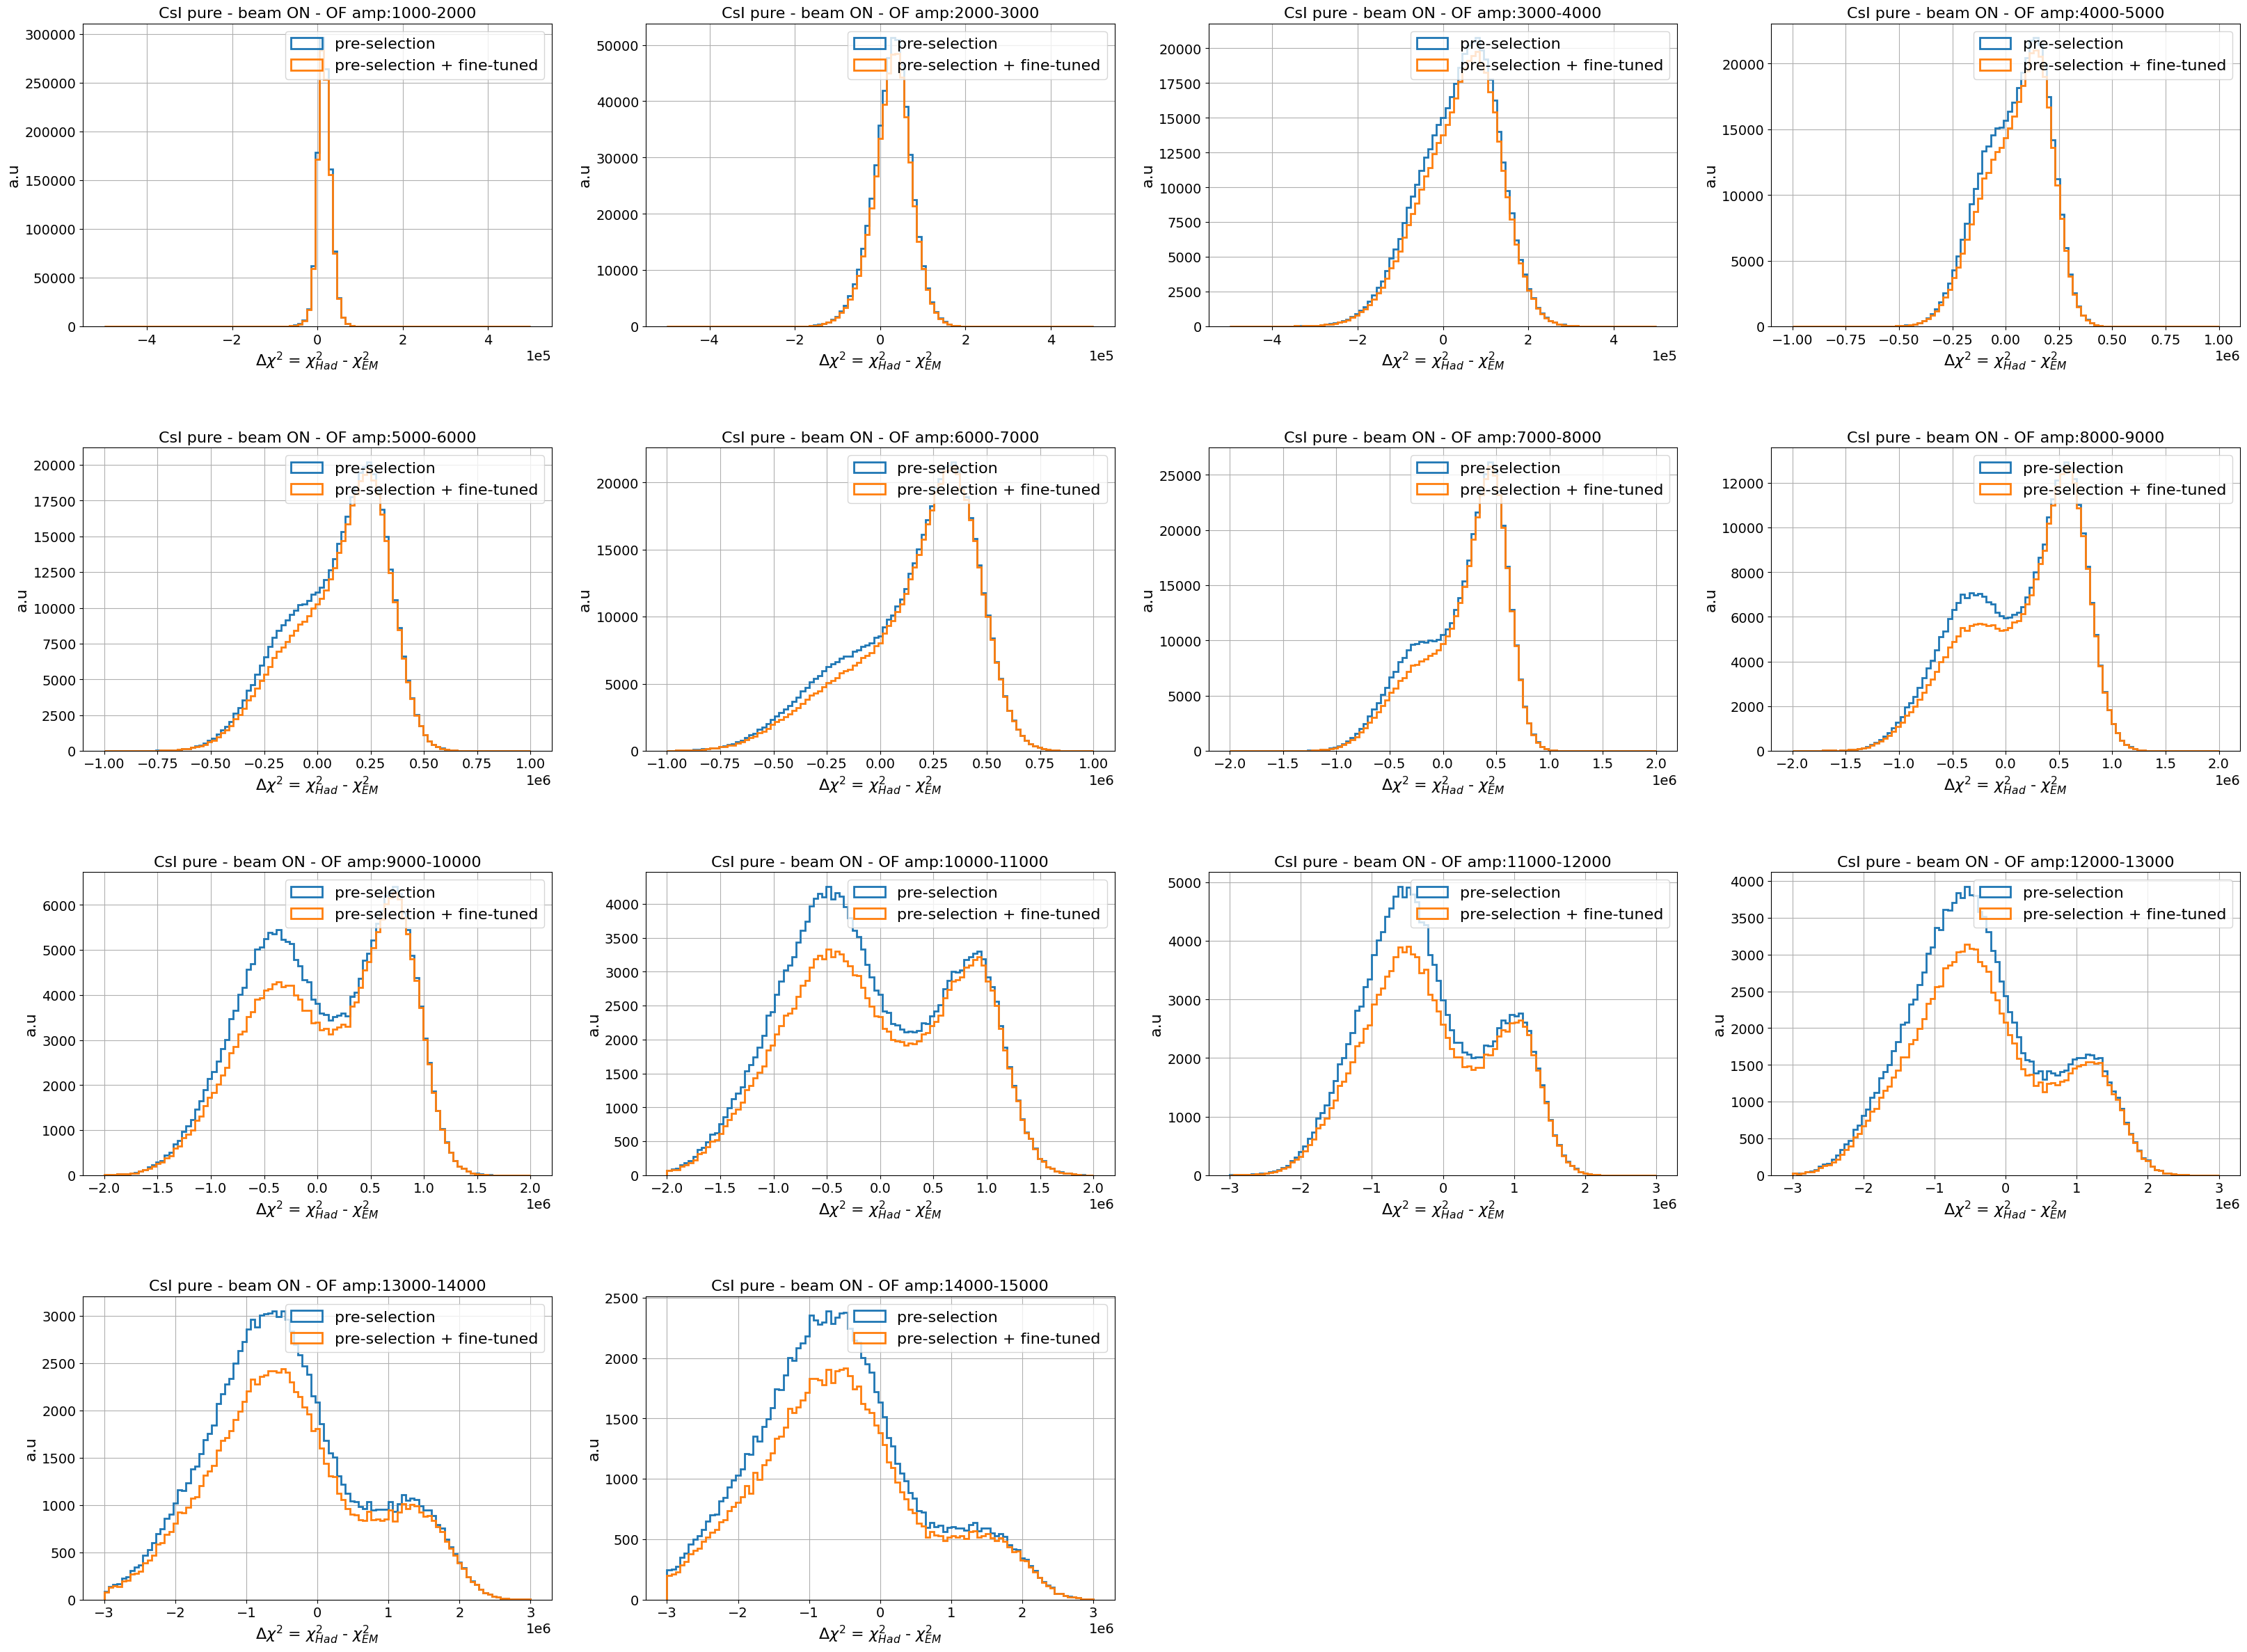

In [6]:



slices=np.arange(1000,15000,1000)
fig, ax = plt.subplots(4, 4, figsize=(40,30))
ax = ax.flatten()
ax[-1].axis('off'); ax[-2].axis('off')
for i, s in enumerate(slices):
    sl = [i for i, x in enumerate(pure.amp_EM_PS) if x>s and x<s+1000]
    if s  < 4000: bins = np.linspace(-0.5e6,0.5e6,100)
    elif s  < 7000: bins = np.linspace(-1e6,1e6,100)
    elif s  < 11000: bins = np.linspace(-2e6,2e6,100)
    else: bins = np.linspace(-3e6,3e6,100)
    weights = np.ones_like(np.take(pure.deltachi2_PS,sl))/len(np.take(pure.deltachi2_PS,sl))
    ax[i].hist(np.take(pure.deltachi2_PS,sl), bins =bins, histtype = 'step', linewidth =2, label = 'pre-selection')
    sl = [i for i, x in enumerate(pure.amp_EM_PS_FT) if x>s and x<s+1000]
    if s  < 4000: bins = np.linspace(-0.5e6,0.5e6,100)
    elif s  < 7000: bins = np.linspace(-1e6,1e6,100)
    elif s  < 11000: bins = np.linspace(-2e6,2e6,100)
    else: bins = np.linspace(-3e6,3e6,100)
    weights = np.ones_like(np.take(pure.deltachi2_PS_FT,sl))/len(np.take(pure.deltachi2_PS_FT,sl))
    ax[i].hist(np.take(pure.deltachi2_PS_FT,sl), bins =bins, histtype = 'step' , linewidth =2, label = 'pre-selection + fine-tuned')
    ax[i].set_title('CsI pure - beam ON - OF amp:'+str(s)+'-'+str(s+1000))
    ax[i].set_xlabel(r'$\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$')
    ax[i].set_ylabel('a.u')
    ax[i].grid()
    ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[i].legend()
plt.show()

peak memory: 4563.66 MiB, increment: 183.28 MiB


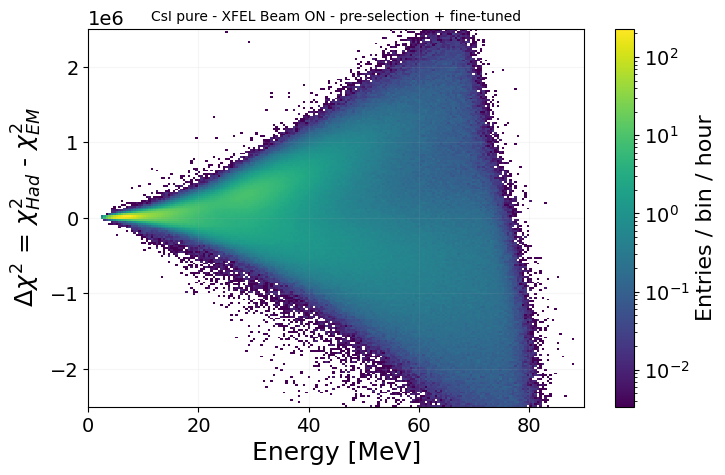

In [14]:
%%memit
E = Ecalibration(pure.integrated_raw_PS_FT, 'pure')
plt.figure(figsize=(8, 5))
w = np.ones_like(pure.deltachi2_PS_FT)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E , pure.deltachi2_PS_FT ,bins=(np.linspace(0,90,200),np.linspace(-0.25e7, 0.25e7, 200)),weights=w, norm=LogNorm())
plt.xlabel(r'Energy [MeV]',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
plt.grid(alpha=0.1)
plt.title('CsI pure - XFEL Beam ON - pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


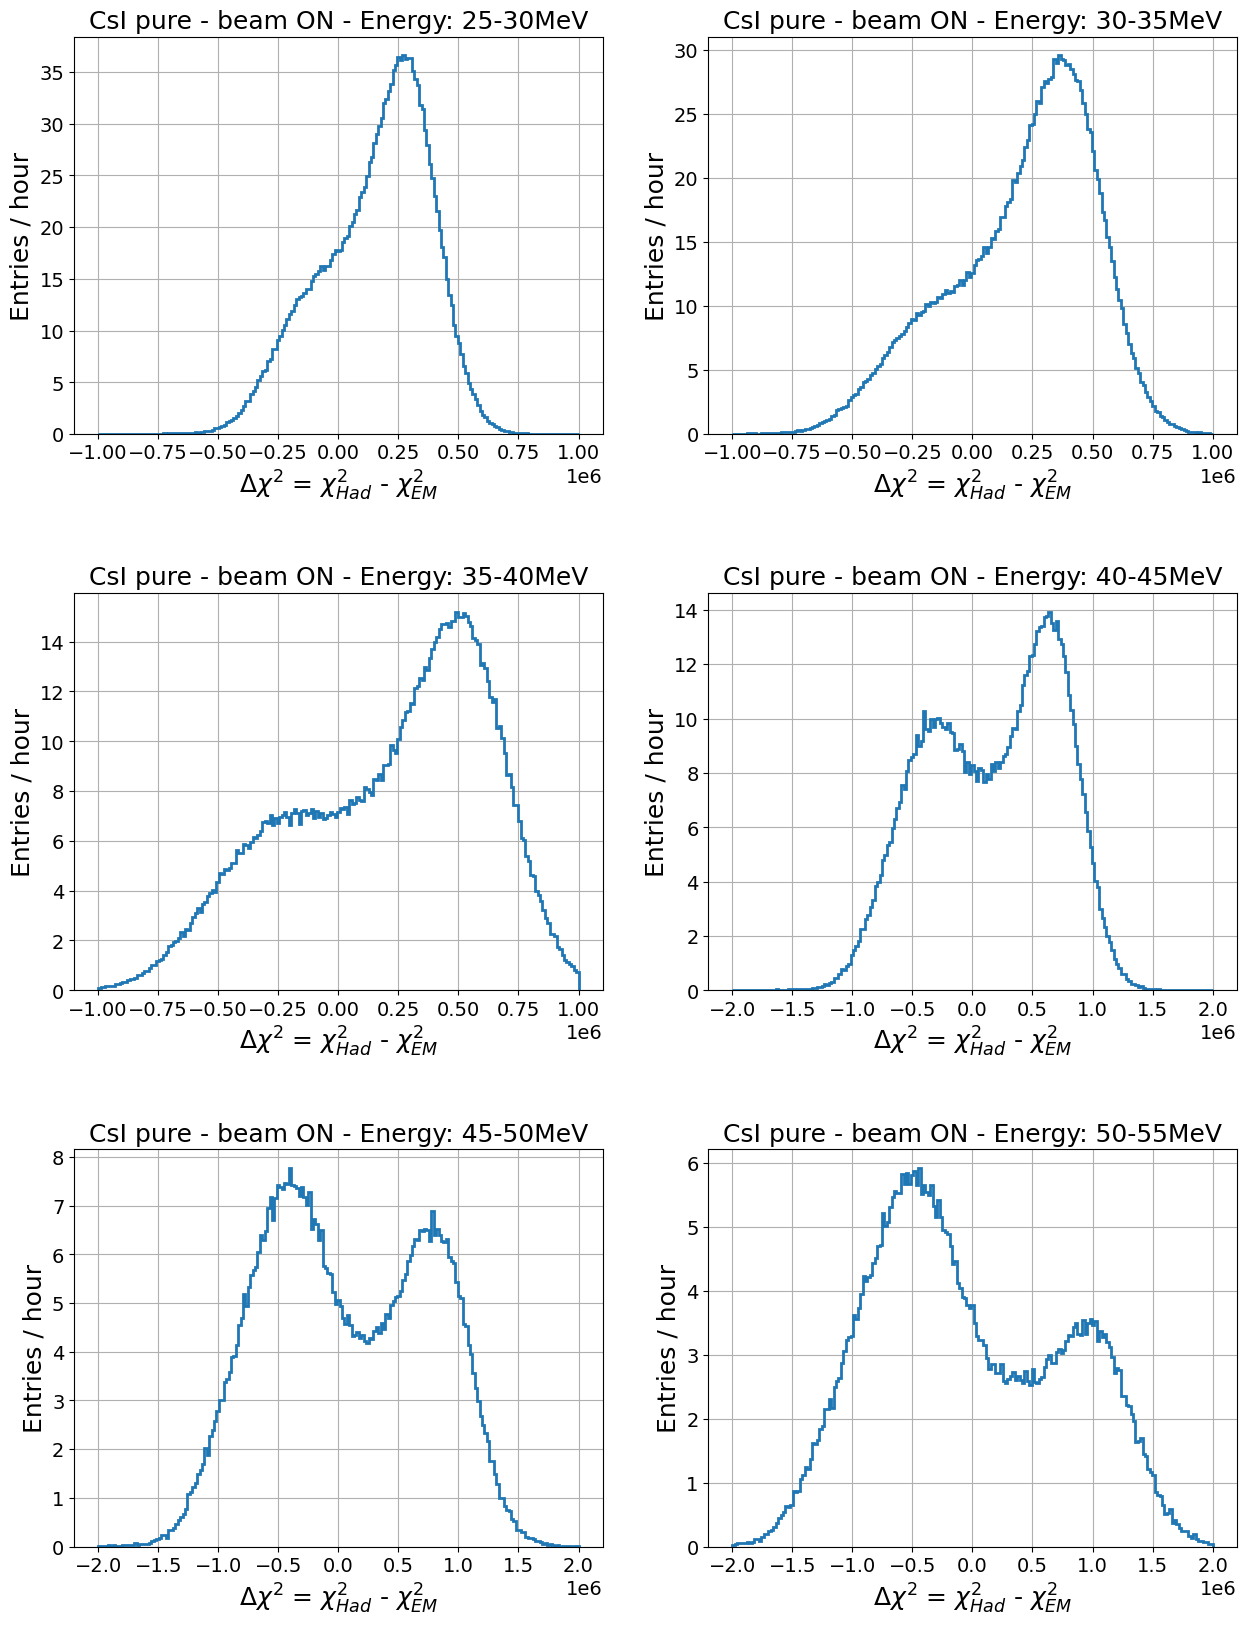

In [36]:

E = Ecalibration(pure.integrated_raw_PS_FT, 'pure')


slices=np.arange(25,60,5)
fig, ax = plt.subplots(3, 2, figsize=(15,20))
ax = ax.flatten()
# ax[-1].axis('off'); ax[-2].axis('off')
for i, s in enumerate(slices):
    if i != 6:
        sl = [i for i, x in enumerate(E) if x>s and x<s+5]
        if s  < 20: bins = np.linspace(-0.5e6,0.5e6,200)
        elif s  < 40: bins = np.linspace(-1e6,1e6,200)
        elif s  < 60: bins = np.linspace(-2e6,2e6,200)
        else: bins = np.linspace(-3e6,3e6,200)
        w = np.ones_like(np.take(pure.deltachi2_PS_FT,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.deltachi2_PS_FT,sl), bins =bins, histtype = 'step' ,weights = w,  linewidth =2, label = 'pre-selection + fine-tuned')
        ax[i].set_title('CsI pure - beam ON - Energy: '+str(s)+'-'+str(s+5)+'MeV',fontsize =18)
        ax[i].set_xlabel(r'$\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize =18)
        ax[i].set_ylabel('Entries / hour',fontsize =18)
        ax[i].grid()
        ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    #     ax[i].legend()

In [13]:



# # ln = [i for i, x in enumerate(pure.deltachi2_PS_removed) if x<0]
# # lp = [i for i, x in enumerate(pure.deltachi2_PS_removed) if x>0]
# # plt.figure(figsize=(20, 12))
# # plt.subplot(2,2,1)
# # plt.hist(np.take(pure.t0pil_Had_PS_removed*fs, ln), bins =np.linspace(-7500,7500,150))
# # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON- Hadron Events removed by pre-selection', fontsize = 12)
# # plt.subplot(2,2,2)
# # plt.hist(np.take(pure.t0pil_EM_PS_removed*fs,lp), bins =np.linspace(-7500,7500,150))
# # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON- EM Events removed by pre-selection', fontsize = 12)
# # plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_PS_removed_log.png',bbox_inches = 'tight')
# # plt.show()
# ln = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x<0]
# lp = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x>0]
# plt.figure(figsize=(20, 12))
# plt.subplot(2,2,1)
# plt.hist(np.take(pure.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-7500,7500,150))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - Hadron Events removed by finetuning', fontsize = 12)
# plt.subplot(2,2,2)
# plt.hist(np.take(pure.t0pil_EM_FT_removed*fs,lp), bins =np.linspace(-7500,7500,150))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - EM Events removed by finetuning', fontsize = 12)
# # plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_FT_removed_log.png',bbox_inches = 'tight')
# plt.show()
# # ln = [i for i, x in enumerate(pure.deltachi2_PS_FT_removed) if x<0]
# # lp = [i for i, x in enumerate(pure.deltachi2_PS_FT_removed) if x>0]
# # plt.figure(figsize=(20, 12))
# # plt.subplot(2,2,1)
# # plt.hist(np.take(pure.t0pil_Had_PS_FT_removed*fs, ln), bins =np.linspace(-7500,7500,150))
# # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON - Hadron Events removed by preselection + finetuning ', fontsize = 12)
# # plt.subplot(2,2,2)
# # plt.hist(np.take(pure.t0pil_EM_PS_FT_removed*fs,lp), bins =np.linspace(-7500,7500,150))
# # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON - EM Events removed by preselection + finetuning ', fontsize = 12)
# # plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_PS_FT_removed_log.png',bbox_inches = 'tight')
# # plt.show()

# ln = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x<0]
# lp = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x>0]
# t0pil_FT_removed = np.concatenate((np.take(pure.t0pil_Had_FT_removed*fs, ln),np.take(pure.t0pil_EM_FT_removed*fs,lp)),0)
# plt.hist(np.take(pure.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-7500,7500,150))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - Events removed by finetuning', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_FT_removed_log.png',bbox_inches = 'tight')
# plt.show()
# plt.hist(np.take(pure.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-100,100,80))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# # plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - Events removed by finetuning', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_FT_removed.png',bbox_inches = 'tight')
# plt.show()

# ln = [i for i, x in enumerate(pure.deltachi2_PS_FT) if x<0]
# lp = [i for i, x in enumerate(pure.deltachi2_PS_FT) if x>0]
# t0pil_PS_FT = np.concatenate((np.take(pure.t0pil_Had_PS_FT*fs, ln),np.take(pure.t0pil_EM_PS_FT*fs,lp)),0)
# plt.hist(np.take(pure.t0pil_Had_PS_FT*fs, ln), bins =np.linspace(-7500,7500,150))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - Events kept after pre-selection finetuning', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_PS_FT_kept_log.png',bbox_inches = 'tight')
# plt.show()
# plt.hist(np.take(pure.t0pil_Had_PS_FT*fs, ln), bins =np.linspace(-100,200,80))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# # plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - Events kept after pre-selection finetuning', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_PS_FT_kept.png',bbox_inches = 'tight')
# plt.show()



# # ln = [i for i, x in enumerate(pure.deltachi2_PS_removed) if x<0]
# # lp = [i for i, x in enumerate(pure.deltachi2_PS_removed) if x>0]
# # plt.figure(figsize=(20, 12))
# # plt.subplot(2,2,1)
# # plt.hist(np.take(pure.t0pil_Had_PS_removed*fs, ln), bins =np.linspace(-30,60,50))
# # # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON- Hadron Events removed by pre-selection', fontsize = 12)
# # plt.subplot(2,2,2)
# # plt.hist(np.take(pure.t0pil_EM_PS_removed*fs,lp), bins =np.linspace(-30,60,50))
# # # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON- EM Events removed by pre-selection', fontsize = 12)
# # plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_PS_removed.png',bbox_inches = 'tight')
# # plt.show()
# ln = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x<0]
# lp = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x>0]
# plt.figure(figsize=(20, 12))
# plt.subplot(2,2,1)
# plt.hist(np.take(pure.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-30,60,50))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# # plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - Hadron Events removed by finetuning', fontsize = 12)
# plt.subplot(2,2,2)
# plt.hist(np.take(pure.t0pil_EM_FT_removed*fs,lp), bins =np.linspace(-30,60,50))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# # plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - EM Events removed by finetuning', fontsize = 12)
# # plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_FT_removed.png',bbox_inches = 'tight')
# plt.show()
# # ln = [i for i, x in enumerate(pure.deltachi2_PS_FT_removed) if x<0]
# # lp = [i for i, x in enumerate(pure.deltachi2_PS_FT_removed) if x>0]
# # plt.figure(figsize=(20, 12))
# # plt.subplot(2,2,1)
# # plt.hist(np.take(pure.t0pil_Had_PS_FT_removed*fs, ln), bins =np.linspace(-30,60,50))
# # # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON - Hadron Events removed by preselection + finetuning ', fontsize = 12)
# # plt.subplot(2,2,2)
# # plt.hist(np.take(pure.t0pil_EM_PS_FT_removed*fs,lp), bins =np.linspace(-30,60,50))
# # # plt.yscale('log')
# # plt.xlabel('pileup t0 [bins]')
# # plt.ylabel('a.u.')
# # plt.grid(alpha = 0.4)
# # plt.title('CsI pure - XFEL Beam ON - EM Events removed by preselection + finetuning ', fontsize = 12)
# # plt.savefig('../../../plots/beamON/t0pileup_p_XFEL_BeamON_PS_FT_removed.png',bbox_inches = 'tight')
# # plt.show()

# ln = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x<0]
# lp = [i for i, x in enumerate(pure.deltachi2_FT_removed) if x>0]
# plt.figure(figsize=(20, 12))
# plt.subplot(2,2,1)
# plt.hist(np.take(pure.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(1200,2000,800))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# # plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - Hadron Events removed by finetuning', fontsize = 12)
# plt.subplot(2,2,2)
# plt.hist(np.take(pure.t0pil_EM_FT_removed*fs,lp), bins =np.linspace(1200,2000,800))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# # plt.yscale('log')
# plt.grid(alpha = 0.4)
# plt.title('CsI pure - XFEL Beam ON - EM Events removed by finetuning', fontsize = 12)
# plt.show()

In [10]:
1/(250*2e-9)


1999999.9999999998

In [11]:
l , m = [], []

        
# for i in range (len (pure.deltachi2_PS_FT)):
#     if pure.deltachi2_PS_FT[i]>-0.1e6 and pure.deltachi2_PS_FT[i]<0.1e6:
#         l.append(i)
# print(len(l))
        
for i in range (len (pure.deltachi2_PS_FT)):
    if pure.deltachi2_PS_FT[i]>-0.3e6 and pure.deltachi2_PS_FT[i]<0.3e6:
        l.append(i)
print(len(l))

        
for i in l:        
    if pure.amp_EM_PS_FT[i]>6000:
        m.append(i)
print(len(l), len(m))
# for i in l:        
#     if pure.t0pil_Had_PS_FT[i]*fs<-10 and pure.t0pil_Had_PS_FT[i]*fs>-20 and pure.deltachi2_PS_FT[i]<-0.001e6:
#         m.append(i)
# print(len(l), len(m))

# for i in l:        
#     if pure.t0pil_EM_PS_FT[i]*fs<-20 and pure.t0pil_EM_PS_FT[i]*fs>-30  and pure.deltachi2_PS_FT[i]>0.001e6:
#         m.append(i)
# print(len(l), len(m))


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3430678
3430678 712251


--------- 0 ---------------
HAD 31.000000000000004 -213.45220126621768 0.09774817824254216
EM 18.0 217.26699584686685 0.10968329334461896
delchi2 -0.029303374416515232 chi2_EM 0.3279748925799057 chi2_Had 0.29867151816339044
wavedump_pure_XFEL04_21-07-19_05-24-06


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_pure_XFEL05_21-07-20_16-50-45.txt' mode='r' encoding='utf-8'>


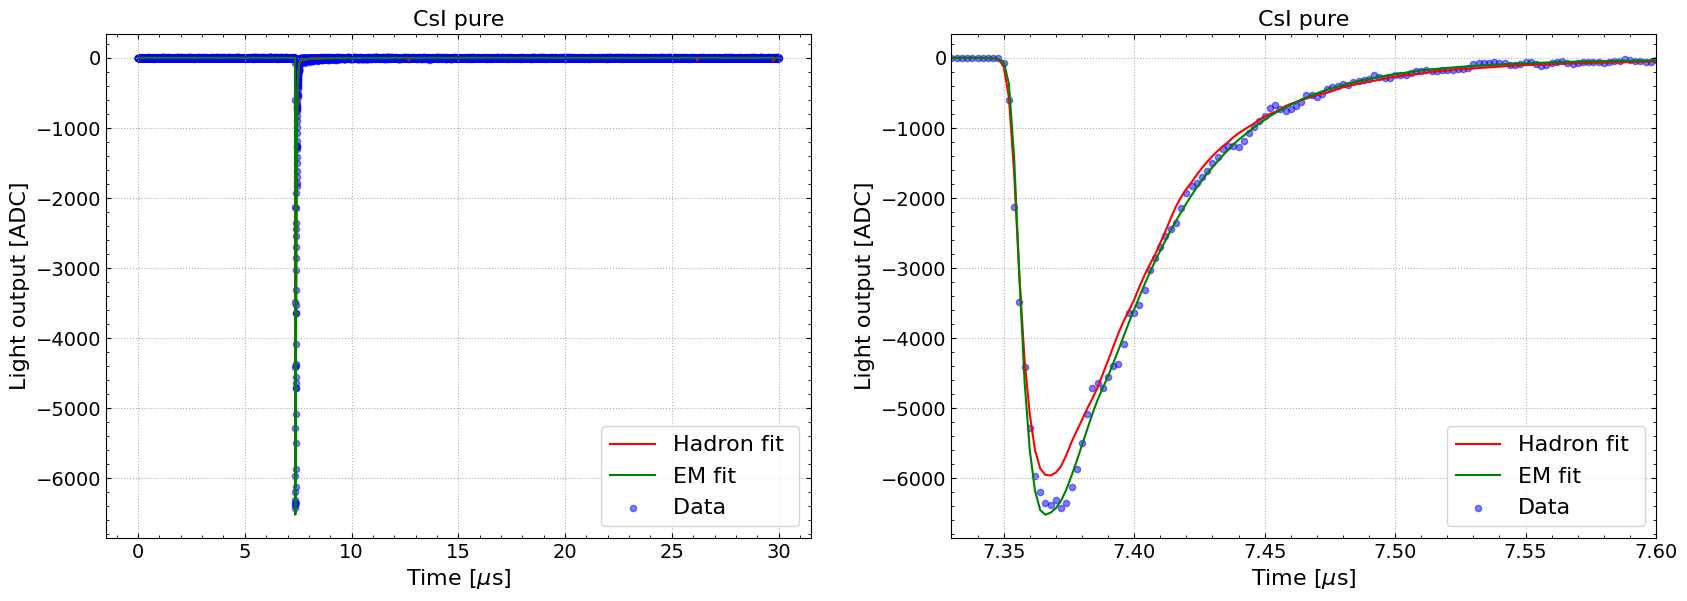

--------- 1 ---------------
HAD 33.0 -254.32370156333837 0.033599805662035076
EM 15.999999999999998 250.6512512187046 0.02203420055814581
delchi2 0.13837955577005445 chi2_EM 0.31804721336060765 chi2_Had 0.4564267691306621
wavedump_pure_XFEL05_21-07-21_14-33-42


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-19_05-24-06.txt' mode='r' encoding='utf-8'>


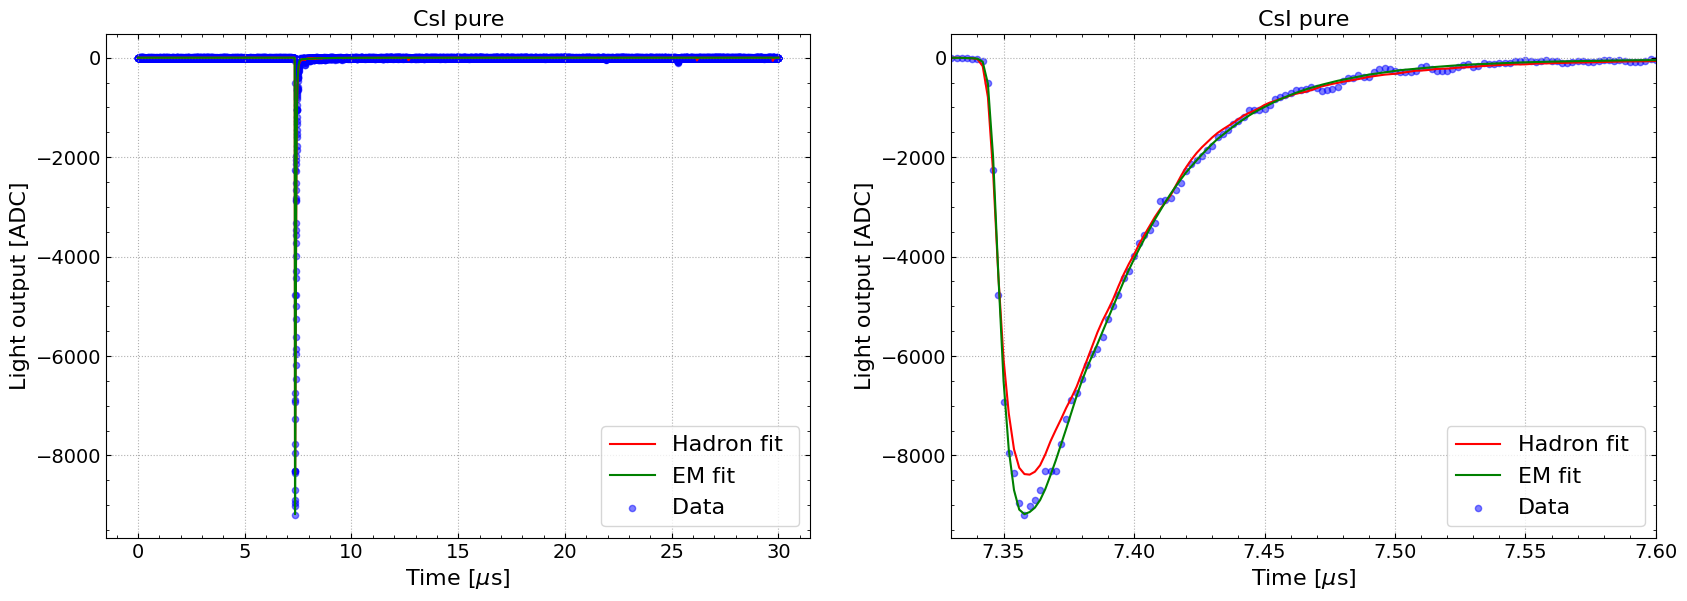

--------- 2 ---------------
HAD 7.999999999999999 129.22346955873127 0.2498215069155524
EM 15.0 328.48136900208647 0.2880316095015989
delchi2 -0.2713524265400618 chi2_EM 0.798967972479254 chi2_Had 0.5276155459391921
wavedump_pure_XFEL03_21-07-16_17-43-38


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_pure_XFEL05_21-07-21_14-33-42.txt' mode='r' encoding='utf-8'>


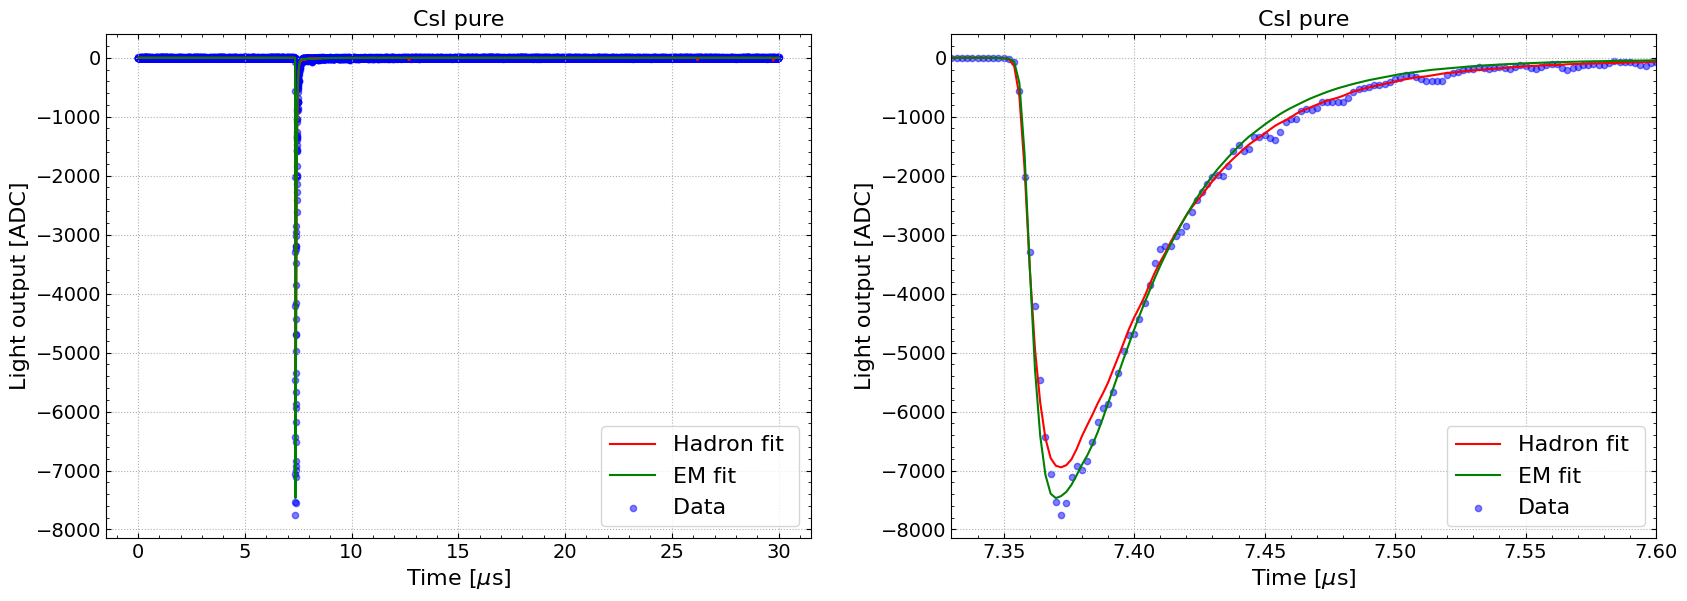

--------- 3 ---------------
HAD 14.0 -370.7073392649568 0.06748439307723968
EM 22.0 210.4412592220433 0.08900539666926703
delchi2 -0.028211938319534065 chi2_EM 0.9589254985072613 chi2_Had 0.9307135601877272
wavedump_pure_XFEL04_21-07-16_21-05-32


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_17-43-38.txt' mode='r' encoding='utf-8'>


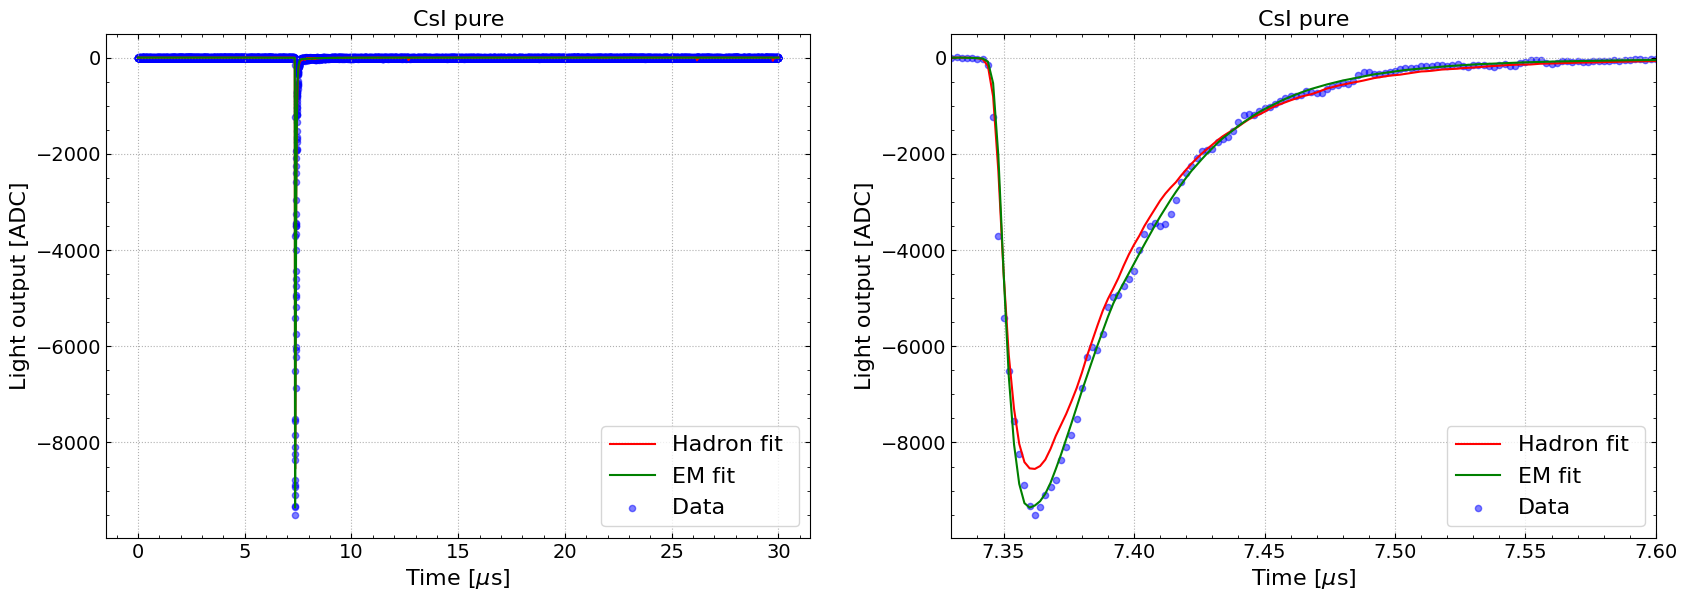

--------- 4 ---------------
HAD 14.0 -390.987430325496 0.06050217767590336
EM -7.999999999999999 208.1312905470486 0.060401645909422354
delchi2 0.21826830921341478 chi2_EM 0.6713843130910992 chi2_Had 0.889652622304514
wavedump_pure_XFEL03_21-07-16_06-37-01


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-16_21-05-32.txt' mode='r' encoding='utf-8'>


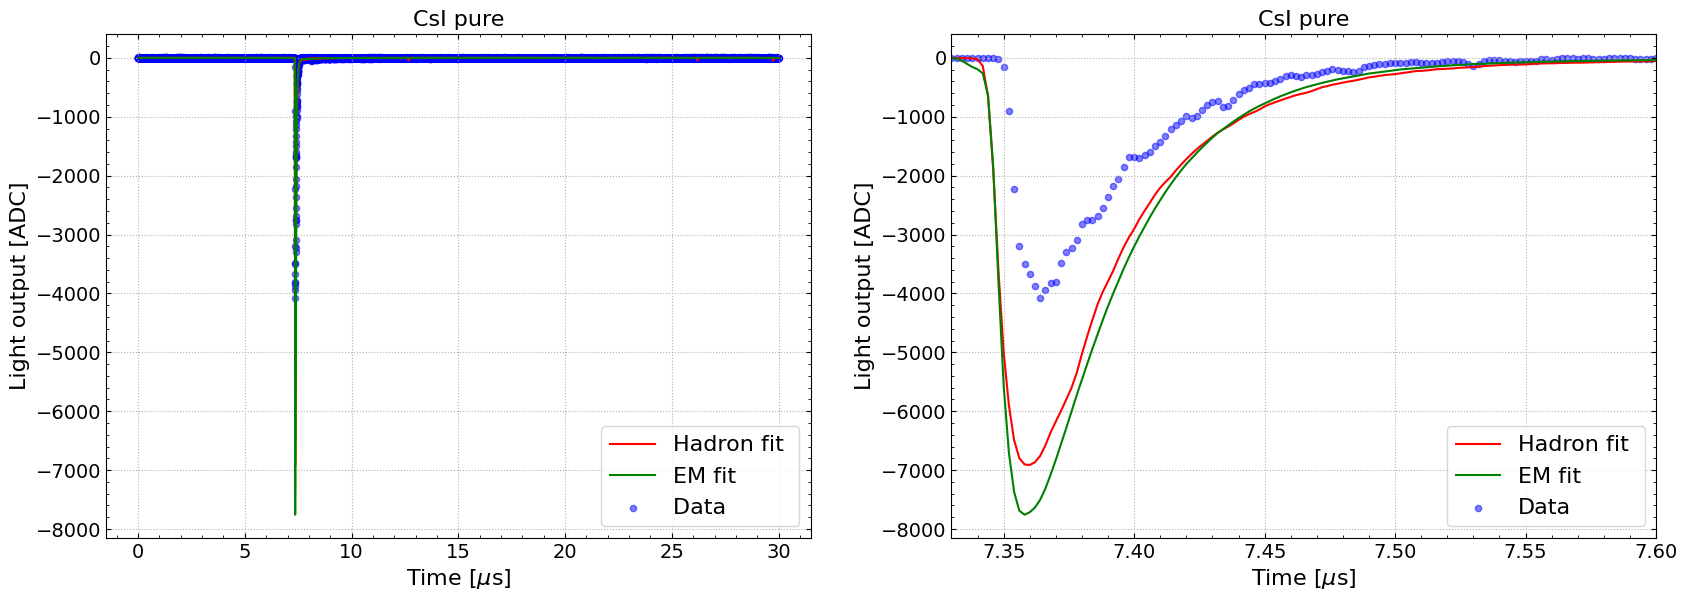

--------- 5 ---------------
HAD 14.0 -394.7192829028145 0.05466154171037823
EM -5.0 203.29980055595297 0.06387413223047117
delchi2 0.16741825452303885 chi2_EM 0.5788696241309941 chi2_Had 0.7462878786540329
wavedump_pure_XFEL05_21-07-21_04-57-58


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_06-37-01.txt' mode='r' encoding='utf-8'>


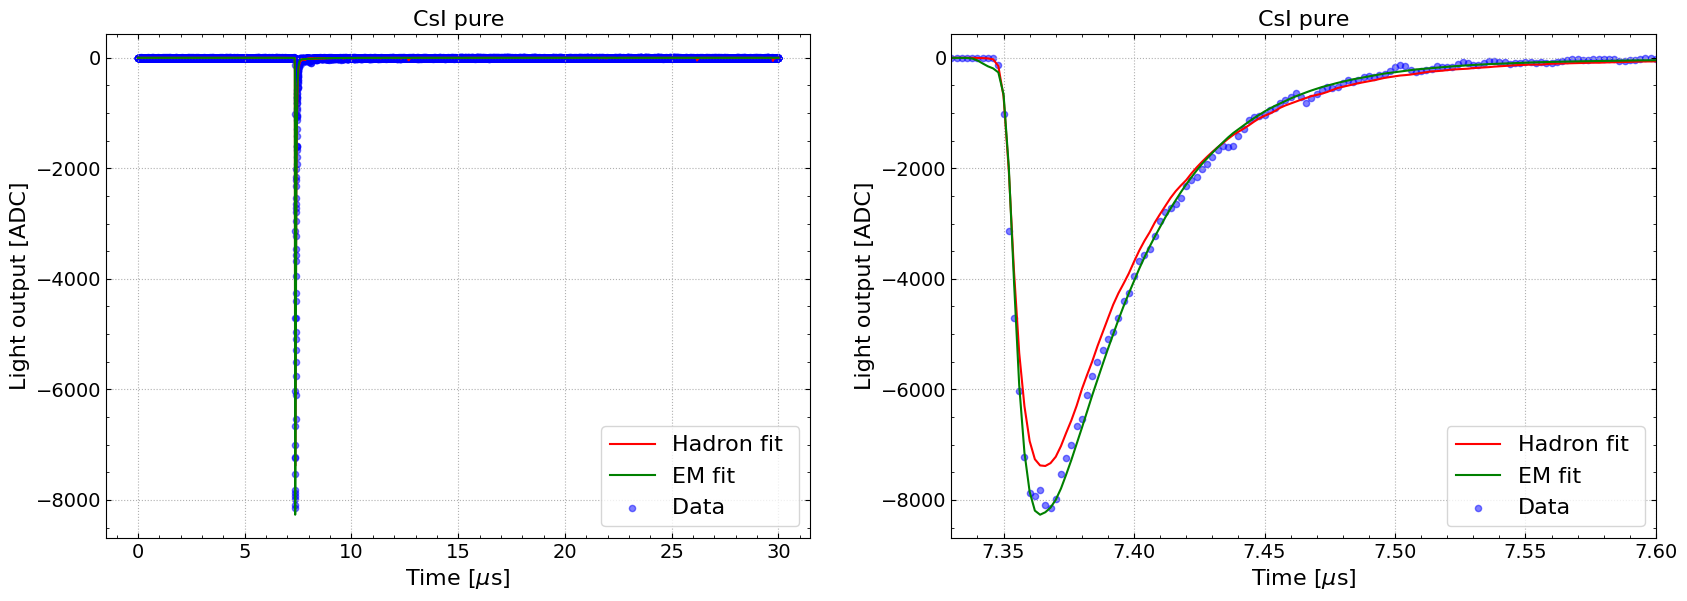

--------- 6 ---------------
HAD 11.0 -192.8321606945401 0.06175572926371726
EM 22.0 539.5211540776761 0.04246740271748384
delchi2 -0.19056715039491653 chi2_EM 0.8773577867113351 chi2_Had 0.6867906363164187
wavedump_pure_XFEL06_21-07-25_14-32-05


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_pure_XFEL05_21-07-21_04-57-58.txt' mode='r' encoding='utf-8'>


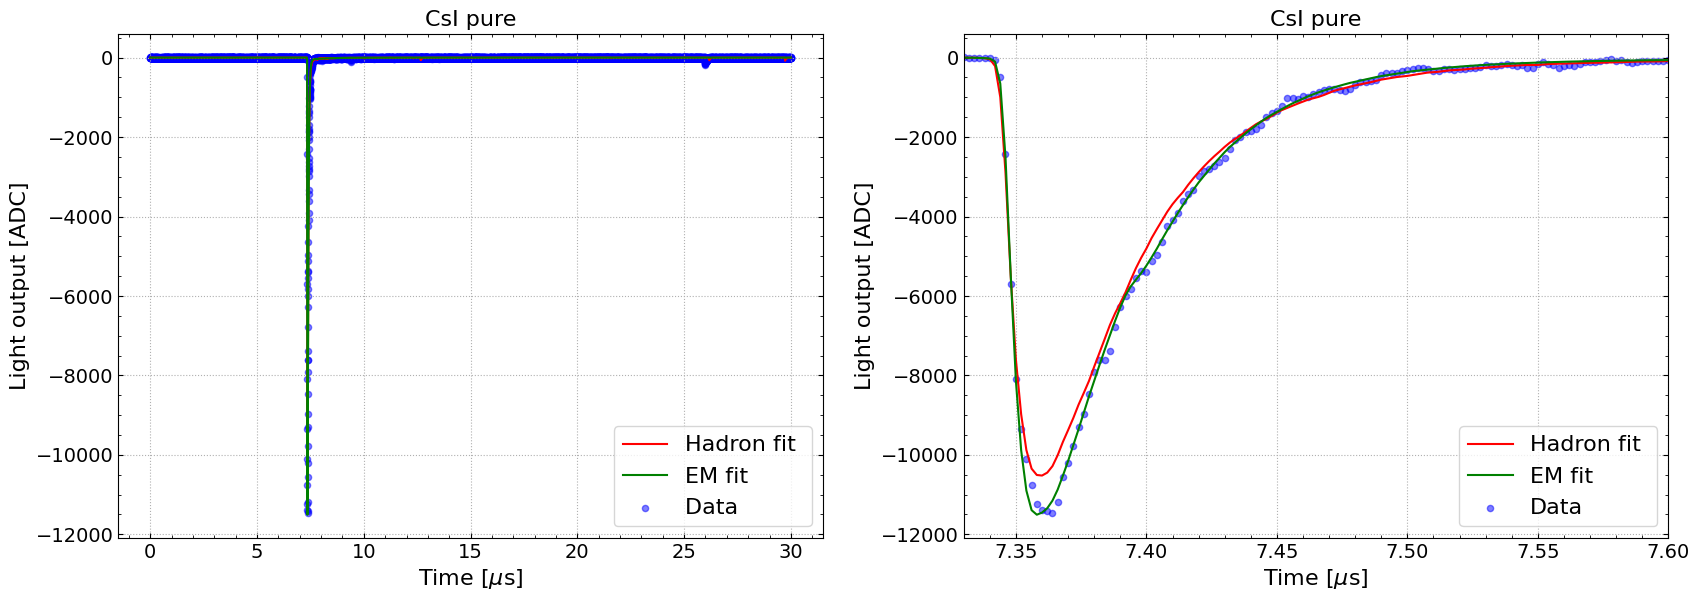

--------- 7 ---------------
HAD 3328.0 131.7238991111475 0.3502652744946912
EM 15.999999999999998 447.69967870954724 0.3748379830449653
delchi2 -0.28100996908196807 chi2_EM 0.8370613935457617 chi2_Had 0.5560514244637936
wavedump_pure_XFEL04_21-07-17_04-55-12


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-25_14-32-05.txt' mode='r' encoding='utf-8'>


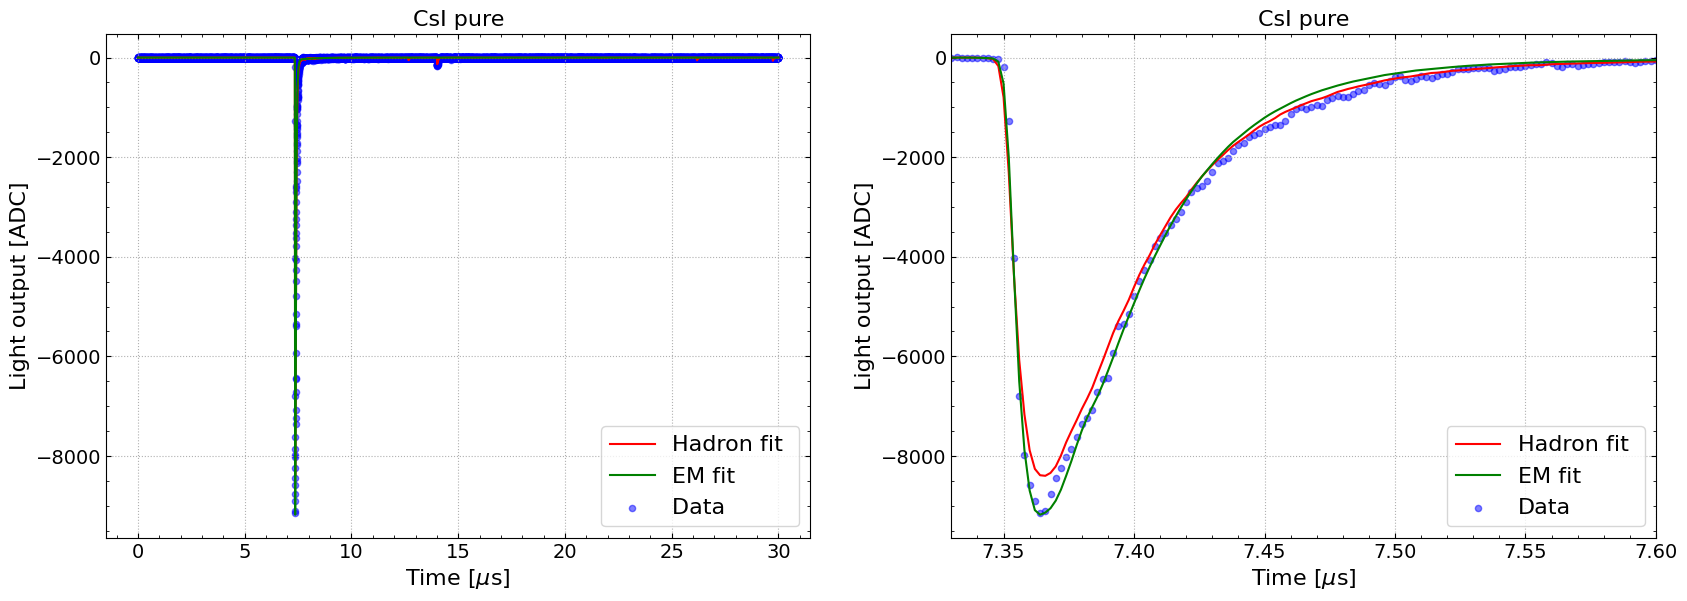

--------- 8 ---------------
HAD 24.0 -283.128143225797 0.10402127383137229
EM 34.0 97.65717331220378 0.11424307432710169
delchi2 0.13695774328261615 chi2_EM 0.36951200897948444 chi2_Had 0.5064697522621006
wavedump_pure_XFEL03_21-07-16_14-56-59


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-17_04-55-12.txt' mode='r' encoding='utf-8'>


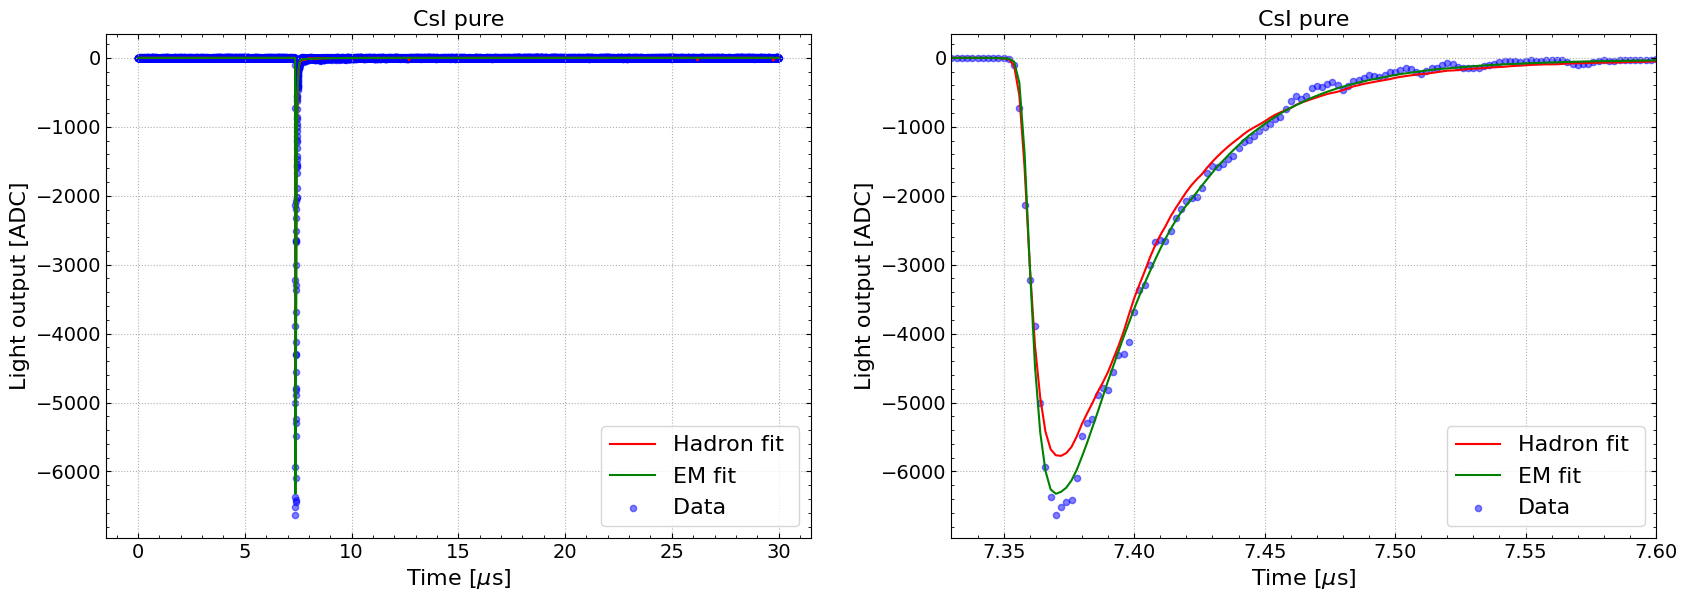

--------- 9 ---------------
HAD 52.0 125.2435839771552 0.05457400108675143
EM 35.0 360.63509148389 0.05514972804233106
delchi2 -0.17881341485655308 chi2_EM 0.7537591072688401 chi2_Had 0.574945692412287
wavedump_pure_XFEL03_21-07-15_22-47-21


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_14-56-59.txt' mode='r' encoding='utf-8'>


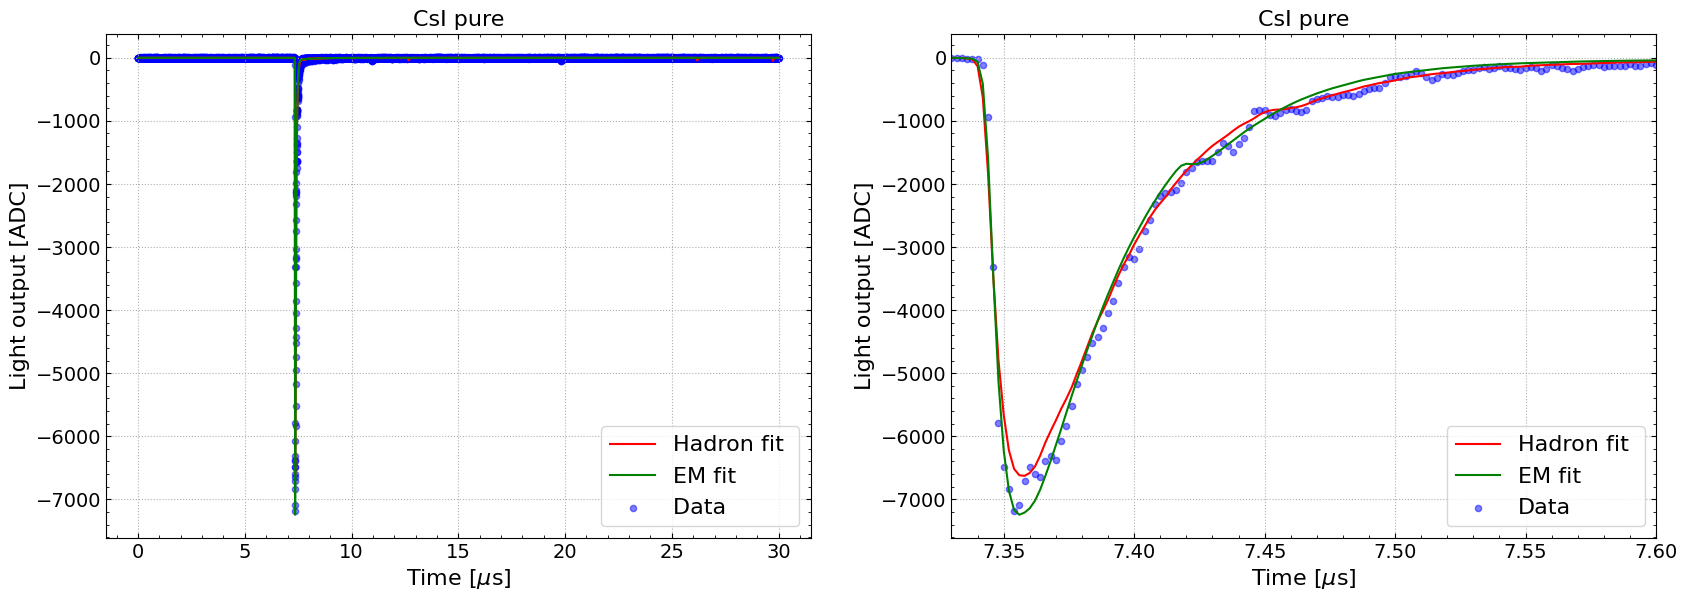

--------- 10 ---------------
HAD 14.0 -347.9051537759451 0.03400012368737403
EM 27.0 363.75014939245034 0.03860752891068787
delchi2 -0.026484468984276057 chi2_EM 0.5918463608450889 chi2_Had 0.5653618918608129
wavedump_pure_XFEL07_21-07-30_20-34-40


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-15_22-47-21.txt' mode='r' encoding='utf-8'>


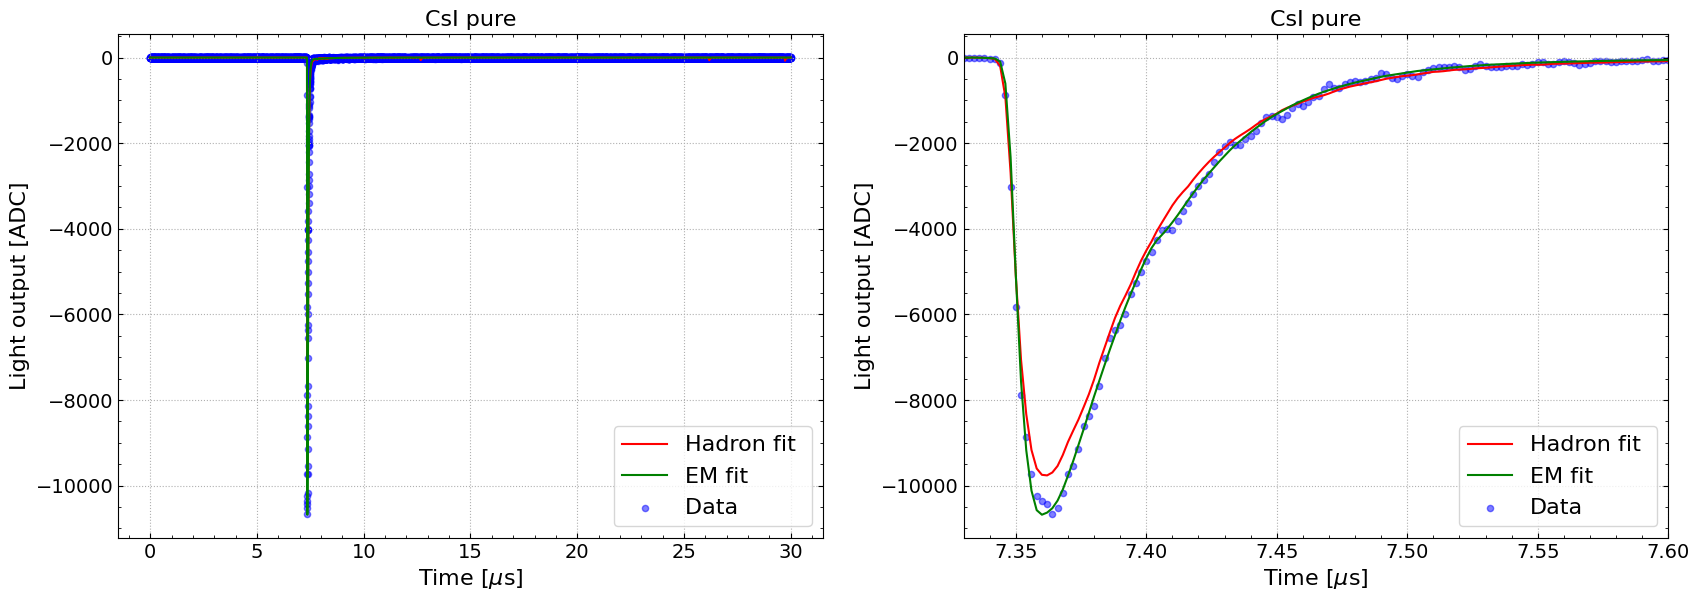

--------- 11 ---------------
HAD 12.0 -396.40822021843815 0.1665445552167882
EM 17.0 342.3320447402125 0.19705935327665872
delchi2 -0.19482229574024676 chi2_EM 2.1528458534697292 chi2_Had 1.9580235577294827
wavedump_pure_XFEL07_21-07-30_13-45-36


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-30_20-34-40.txt' mode='r' encoding='utf-8'>


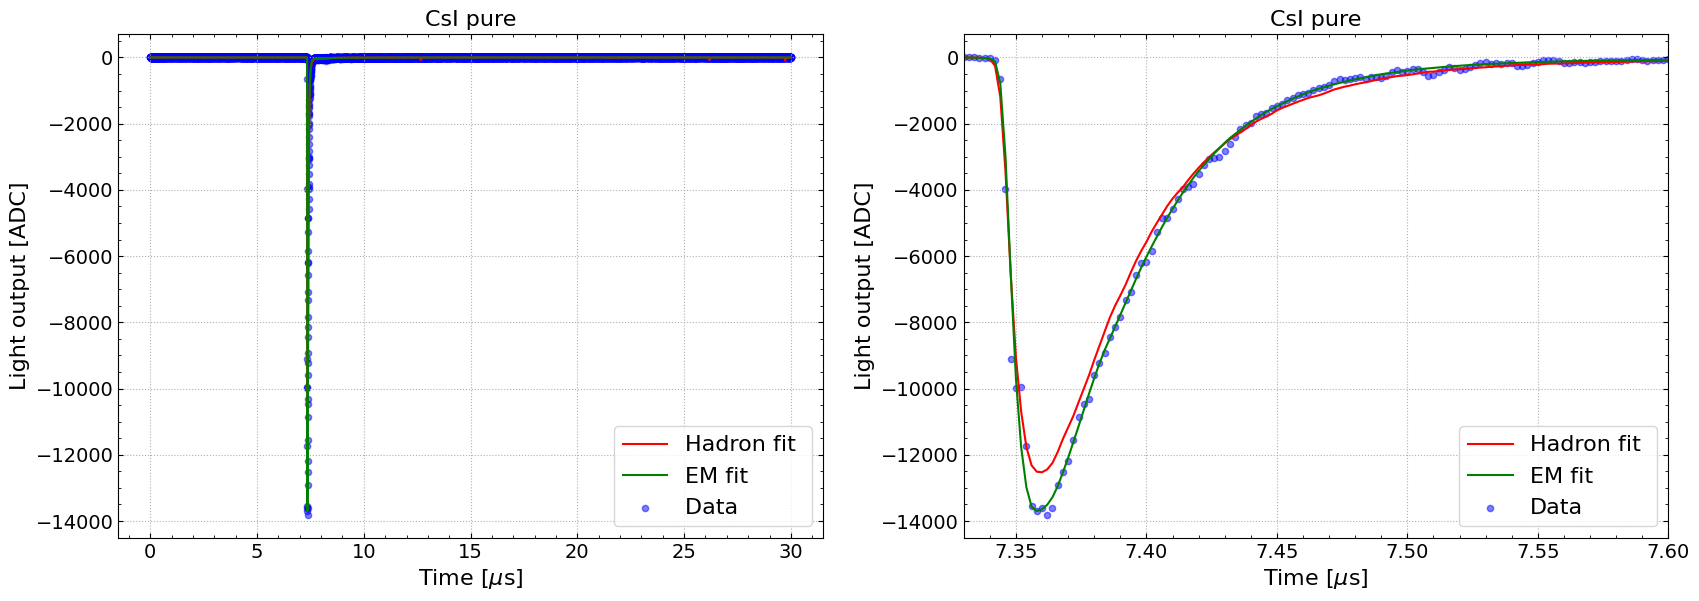

--------- 12 ---------------
HAD 10.0 -401.6262081975933 0.043887934843110384
EM 6.0 -192.48572044092634 0.040828132686737226
delchi2 0.27330899799191954 chi2_EM 0.46590155754730106 chi2_Had 0.7392105555392205
wavedump_pure_XFEL03_21-07-16_01-34-00


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-30_13-45-36.txt' mode='r' encoding='utf-8'>


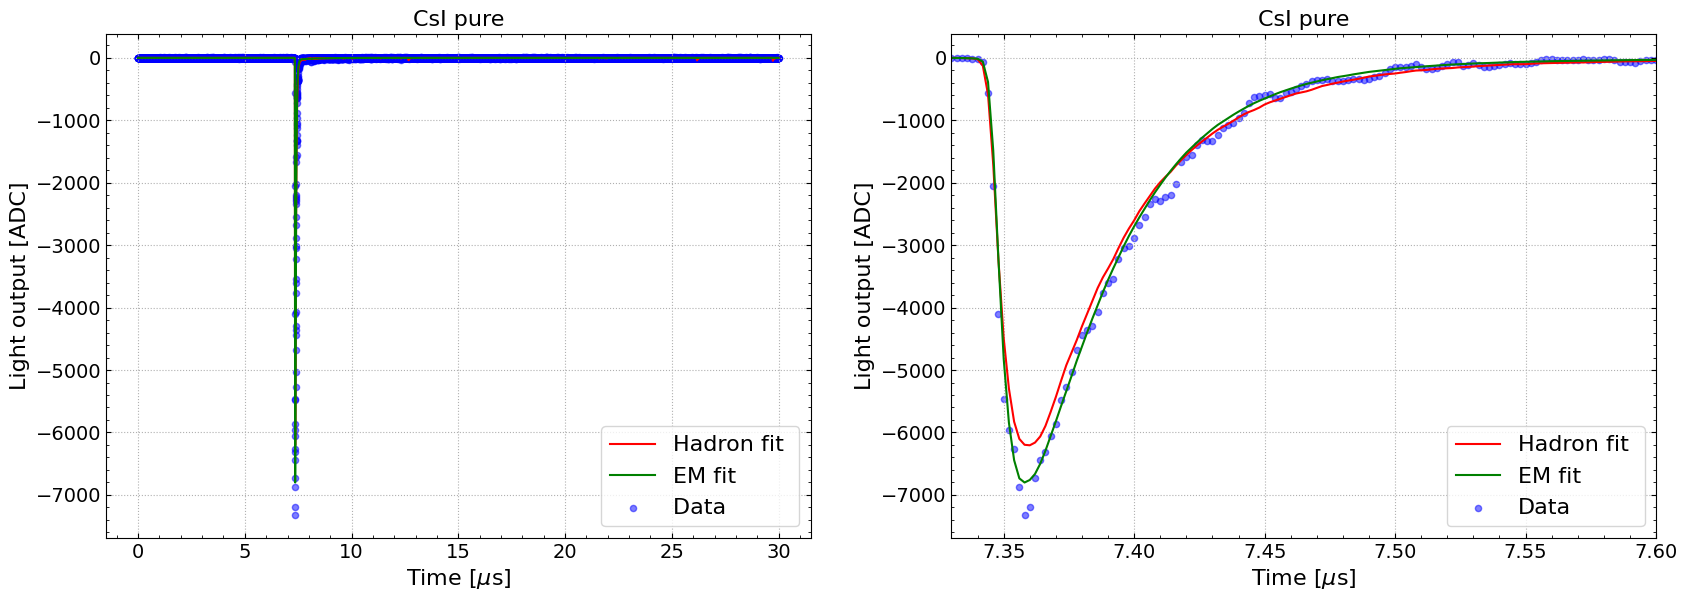

--------- 13 ---------------
HAD 19.0 -315.41473633117084 0.09189720422299812
EM 47.0 200.02429563610022 0.11664055199885744
delchi2 -0.05574711496372521 chi2_EM 0.7265317144516558 chi2_Had 0.6707845994879306
wavedump_pure_XFEL03_21-07-16_00-48-33


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_01-34-00.txt' mode='r' encoding='utf-8'>


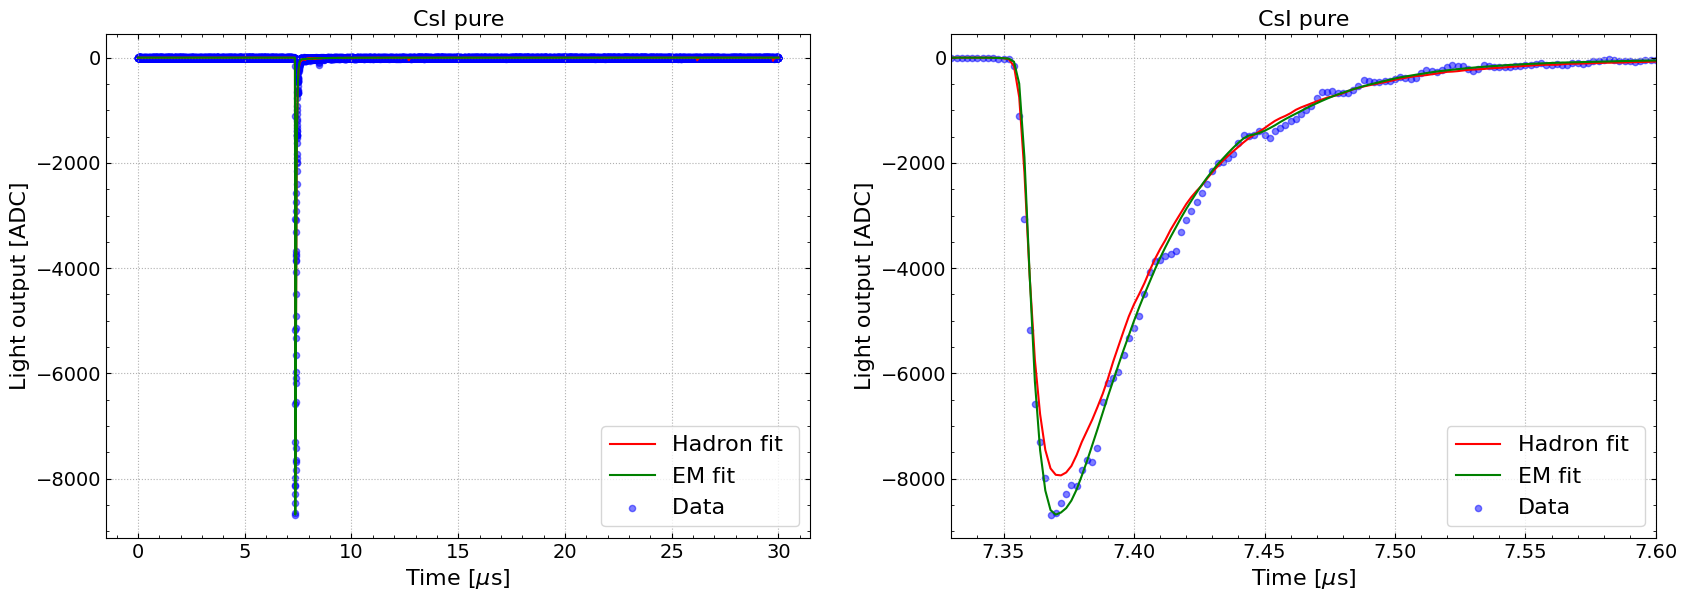

--------- 14 ---------------
HAD 6.0 -220.28800579776907 0.16709095579424174
EM 28.0 532.701973141471 0.12965625307254106
delchi2 0.02338624409392476 chi2_EM 1.737875377091378 chi2_Had 1.7612616211853027
wavedump_pure_XFEL06_21-07-25_21-21-09


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_00-48-33.txt' mode='r' encoding='utf-8'>


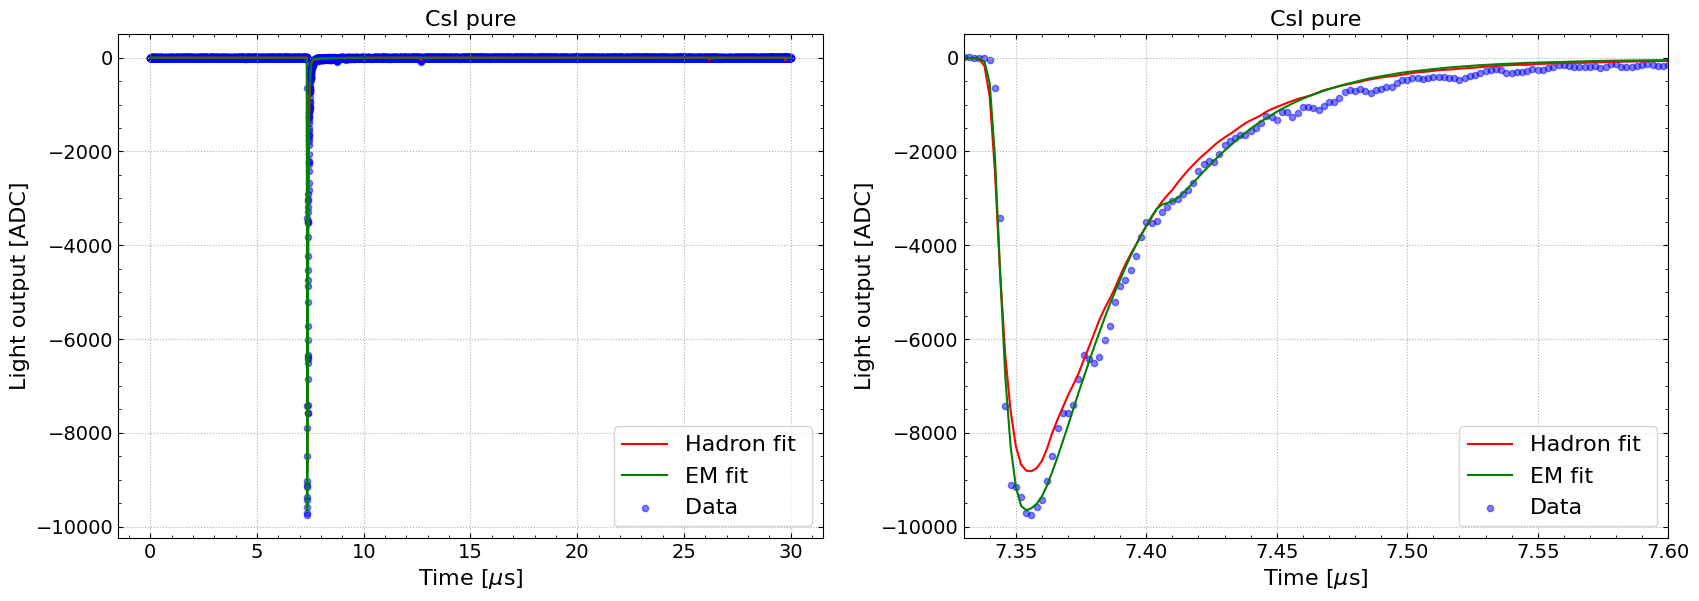

--------- 15 ---------------
HAD -6.0 -104.62838127514351 0.27059010494322155
EM 15.999999999999998 368.9033445516043 0.2996863752597639
delchi2 -0.24769717040230335 chi2_EM 0.7136223178449571 chi2_Had 0.4659251474426538
wavedump_pure_XFEL04_21-07-18_05-55-06


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-25_21-21-09.txt' mode='r' encoding='utf-8'>


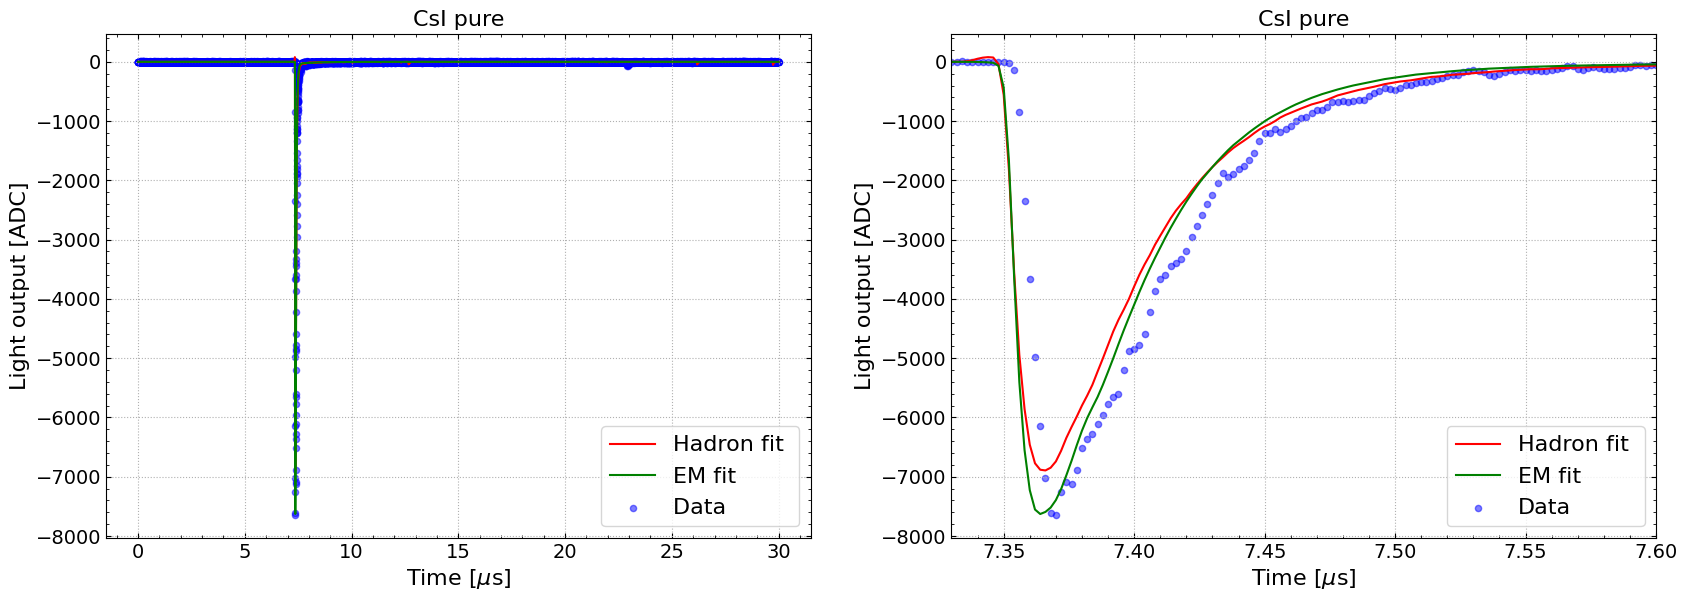

--------- 16 ---------------
HAD 21.0 -160.21160278561342 0.03163095735111565
EM 14.0 315.76652801013415 0.041066129825241396
delchi2 -0.20162462460909783 chi2_EM 0.5657249982816726 chi2_Had 0.36410037367257475
wavedump_pure_XFEL07_21-07-30_23-36-28


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-18_05-55-06.txt' mode='r' encoding='utf-8'>


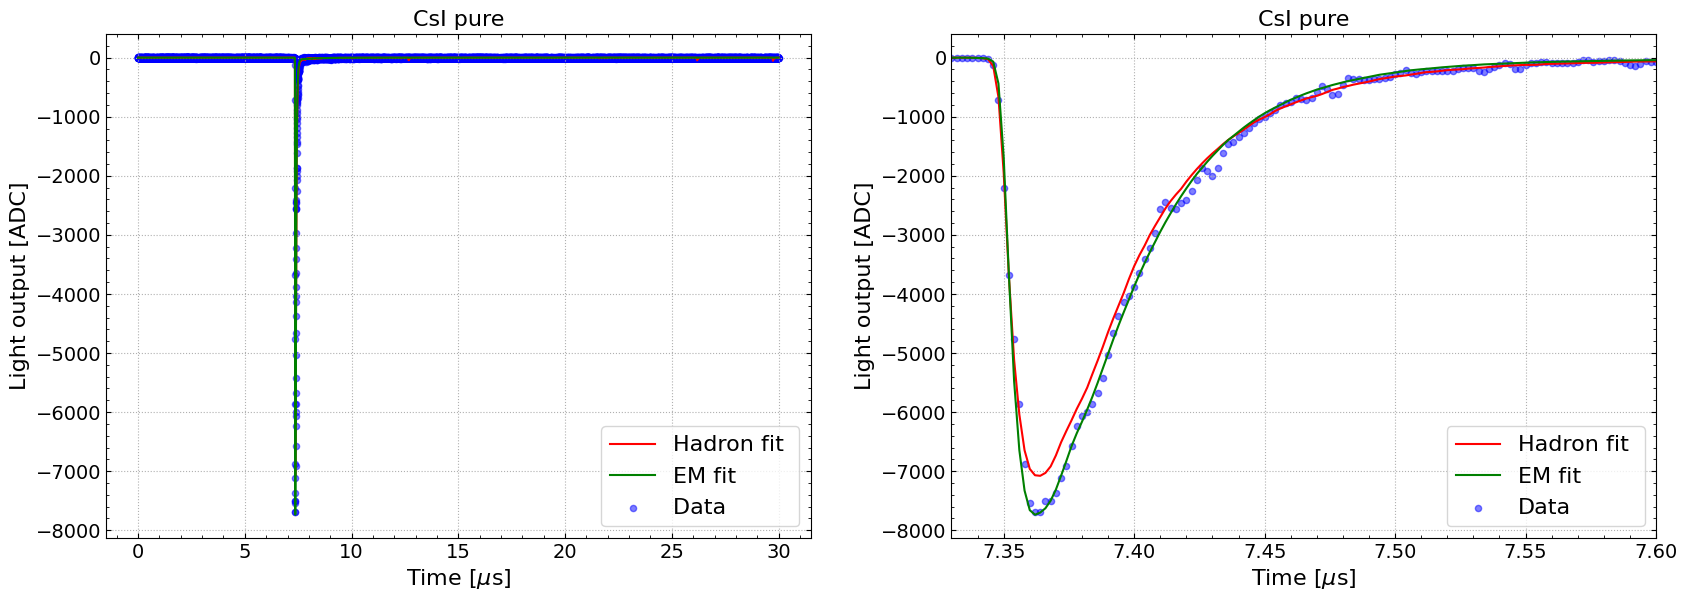

--------- 17 ---------------
HAD 9.0 -298.75019043436987 0.061683332141664715
EM 35.0 264.59736850827943 0.07164580595328658
delchi2 -0.05557502931629121 chi2_EM 0.6763674945063293 chi2_Had 0.6207924651900381
wavedump_pure_XFEL06_21-07-26_07-57-28


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-30_23-36-28.txt' mode='r' encoding='utf-8'>


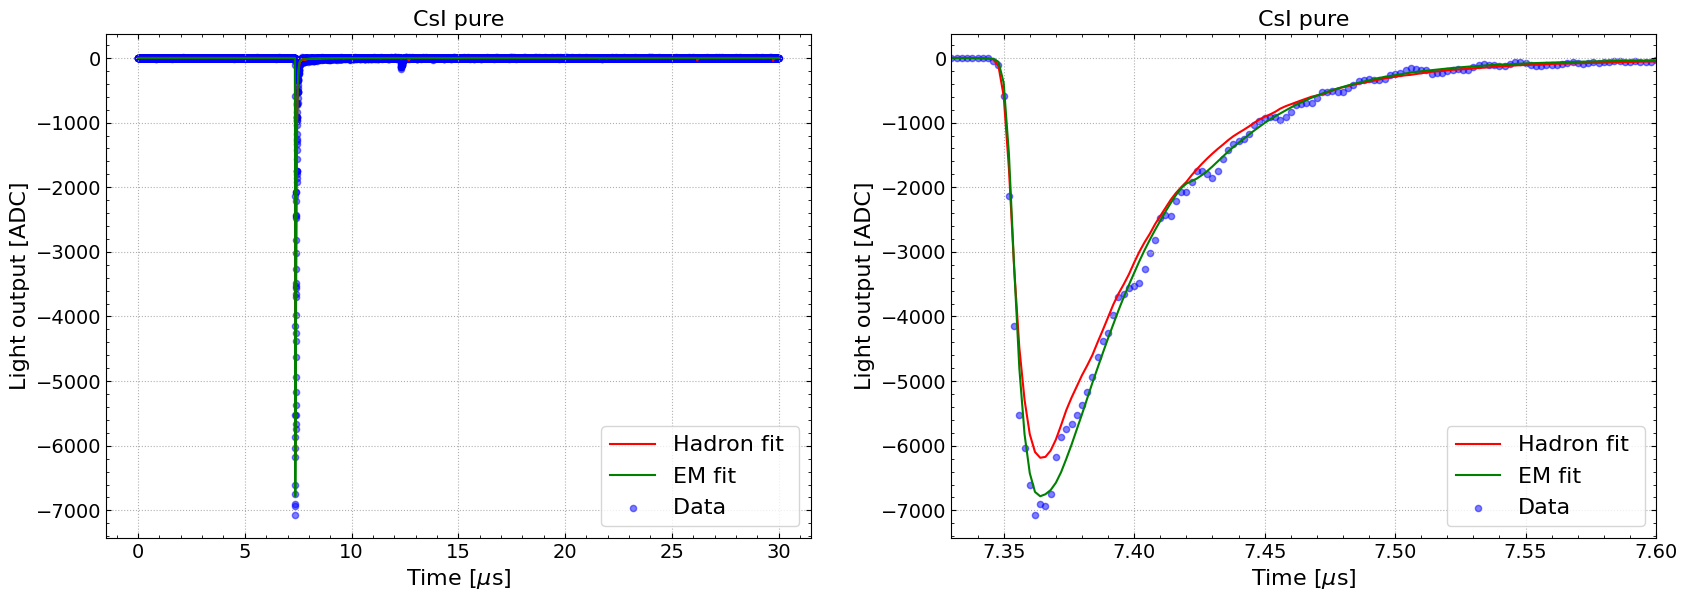

--------- 18 ---------------
HAD 26.0 -396.32144716258085 0.059602762898906626
EM -6.0 183.1482242475804 0.08594437046623561
delchi2 -0.023131646773859857 chi2_EM 0.911609205731526 chi2_Had 0.8884775589576661
wavedump_pure_XFEL03_21-07-16_09-08-31


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-26_07-57-28.txt' mode='r' encoding='utf-8'>


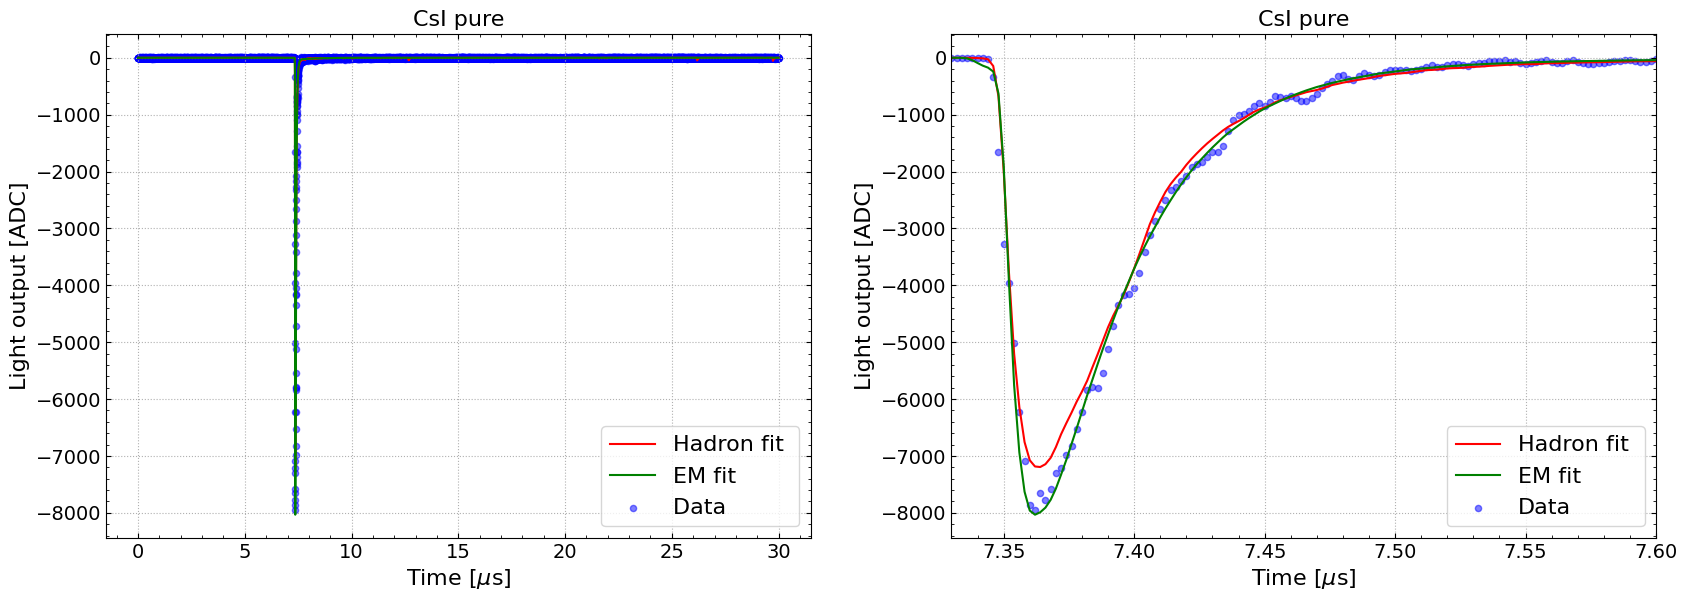

--------- 19 ---------------
HAD 19.0 -315.88884396222534 0.044838008086528464
EM 1.9999999999999998 127.37041087326816 0.03182539637118513
delchi2 0.2906873626881391 chi2_EM 0.34348383636146784 chi2_Had 0.634171199049607
wavedump_pure_XFEL05_21-07-21_23-08-49


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_09-08-31.txt' mode='r' encoding='utf-8'>


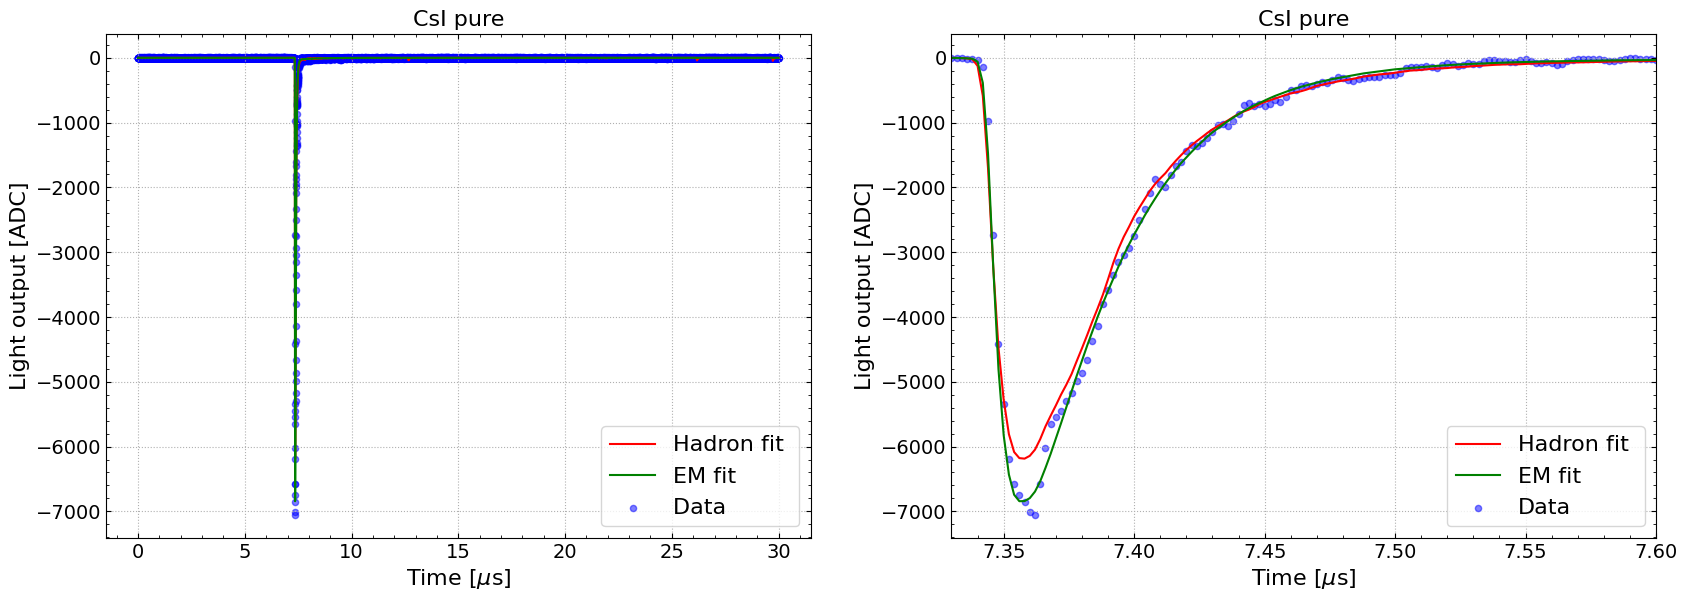

peak memory: 4215.86 MiB, increment: 0.00 MiB


In [23]:
%%memit
j = random.sample(m, 20)
tem_arr = []
for n in range(len(j)): 
    print( '---------', n , '---------------')
    wavenum = pure.waveform_number_PS_FT[j][n]-1
    print('HAD',pure.t0pil_Had_PS_FT[j][n]*fs,  pure.amppil_Had_PS_FT[j][n],   pure.chi2pil_Had_PS_FT[j][n]/1e7)
    print('EM', pure.t0pil_EM_PS_FT[j][n]*fs,  pure.amppil_EM_PS_FT[j][n],   pure.chi2pil_EM_PS_FT[j][n]/1e7)
    print('delchi2', pure.deltachi2_PS_FT[j][n]/1e6, 'chi2_EM', pure.chi2_EM_PS_FT[j][n]/1e6,'chi2_Had', pure.chi2_Had_PS_FT[j][n]/1e6)
    print(pure.rundata_PS_FT[j][n].decode('utf-8'))
    if pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:20]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    elif pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'run12': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:19]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:25]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T
#     print (np.sum(trace_3/np.min(trace_3, axis =1), axis =1) , integrate.trapz(y = trace_3, dx = 1)/np.min(trace_3, axis =1))
#     print(trace_3.shape, min(trace_3[0]), pure.chi2_Had_PS_FT[j][n]/15000, pure.chi2_EM_PS_FT[j][n]/15000)
    plt.figure(figsize = (20,16))
    plt.subplot(2,2,1)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Signal %s'%m[n], color='blue' , alpha=0.5, s =20)
    plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Data ', color='blue' , alpha=0.5, s =20)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Charge ratio %0.4f'% pure.CR_PS_FT[j][n], color='blue' , alpha=0.5, s =20)
    plt.plot(np.arange(15000)*2e-3, pure.amp_Had_PS_FT[j][n]*np.roll(TemplateHAD_p, round(pure.t0_Had_PS_FT[j][n]*(1/2e-9)))+ pure.amppil_Had_PS_FT[j][n]*np.roll(TemplateHAD_p, round(pure.t0pil_Had_PS_FT[j][n]*(1/2e-9))) , 
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000)*2e-3, pure.amp_EM_PS_FT[j][n]*np.roll(TemplateEM_p, round(pure.t0_EM_PS_FT[j][n]*(1/2e-9)))+pure.amppil_EM_PS_FT[j][n]*np.roll(TemplateEM_p, round(pure.t0pil_EM_PS_FT[j][n]*(1/2e-9))) , 
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
#     plt.ylim(-1000,0)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI pure',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
#     plt.xlim(7.2/2e-3,7.6/2e-3)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.subplot(2,2,2)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Signal %s'%m[n], color='blue' , alpha=0.5, s =20)
    plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Data', color='blue' , alpha=0.5, s =20)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Charge ratio %0.4f'% pure.CR_PS_FT[j][n], color='blue' , alpha=0.5, s =20)

    plt.plot(np.arange(15000)*2e-3, pure.amp_Had_PS_FT[j][n]*np.roll(TemplateHAD_p, round(pure.t0_Had_PS_FT[j][n]*(1/2e-9)))+ pure.amppil_Had_PS_FT[j][n]*np.roll(TemplateHAD_p, round(pure.t0pil_Had_PS_FT[j][n]*(1/2e-9))), 
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000)*2e-3, pure.amp_EM_PS_FT[j][n]*np.roll(TemplateEM_p, round(pure.t0_EM_PS_FT[j][n]*(1/2e-9)))+pure.amppil_EM_PS_FT[j][n]*np.roll(TemplateEM_p, round(pure.t0pil_EM_PS_FT[j][n]*(1/2e-9))), 
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI pure',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
    plt.xlim(7.33,7.6)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.show()
    traces[n]= trace_3


In [26]:
np.save('trace4.npy', traces[4])
np.save('trace7_1.npy', traces[7])
np.save('trace14.npy', traces[14])
np.save('trace15.npy', traces[15])

### Template

In [12]:
l , m = [], []
for n in range (len (pure.amp_EM_PS_FT)):
    if pure.amp_EM_PS_FT[n]>6000:
        l.append(n)

for i in l:        
    if pure.deltachi2_PS_FT[i]<-0.5e6:
        m.append(i)
print(len(l), len(m))

2135339 390123


<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFELtesting/wavedump_pure_XFELtesting_21-07-10_17-27-44.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-18_08-41-46.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-26_06-26-34.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-31_01-07-22.txt' mode='r' encoding='utf-8'>
<string>:15: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-28_17-49-24.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.T

<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_pure_XFEL05_21-07-21_01-56-10.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-19_08-41-04.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_pure_XFEL05_21-07-21_17-50-39.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-30_12-45-00.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-18_21-04-08.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrappe

<string>:15: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_05-06-07.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFELtesting/wavedump_pure_XFELtesting_21-07-09_23-26-22.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-26_00-07-48.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-17_11-59-25.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-30_05-25-38.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.T

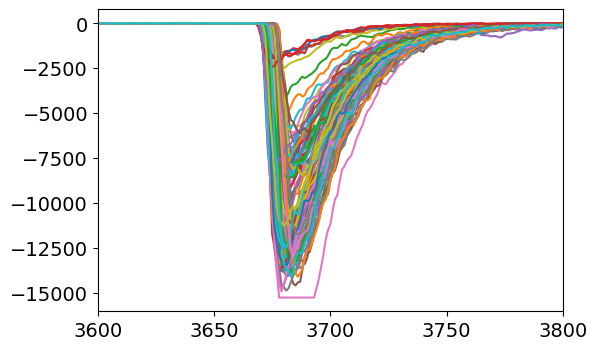

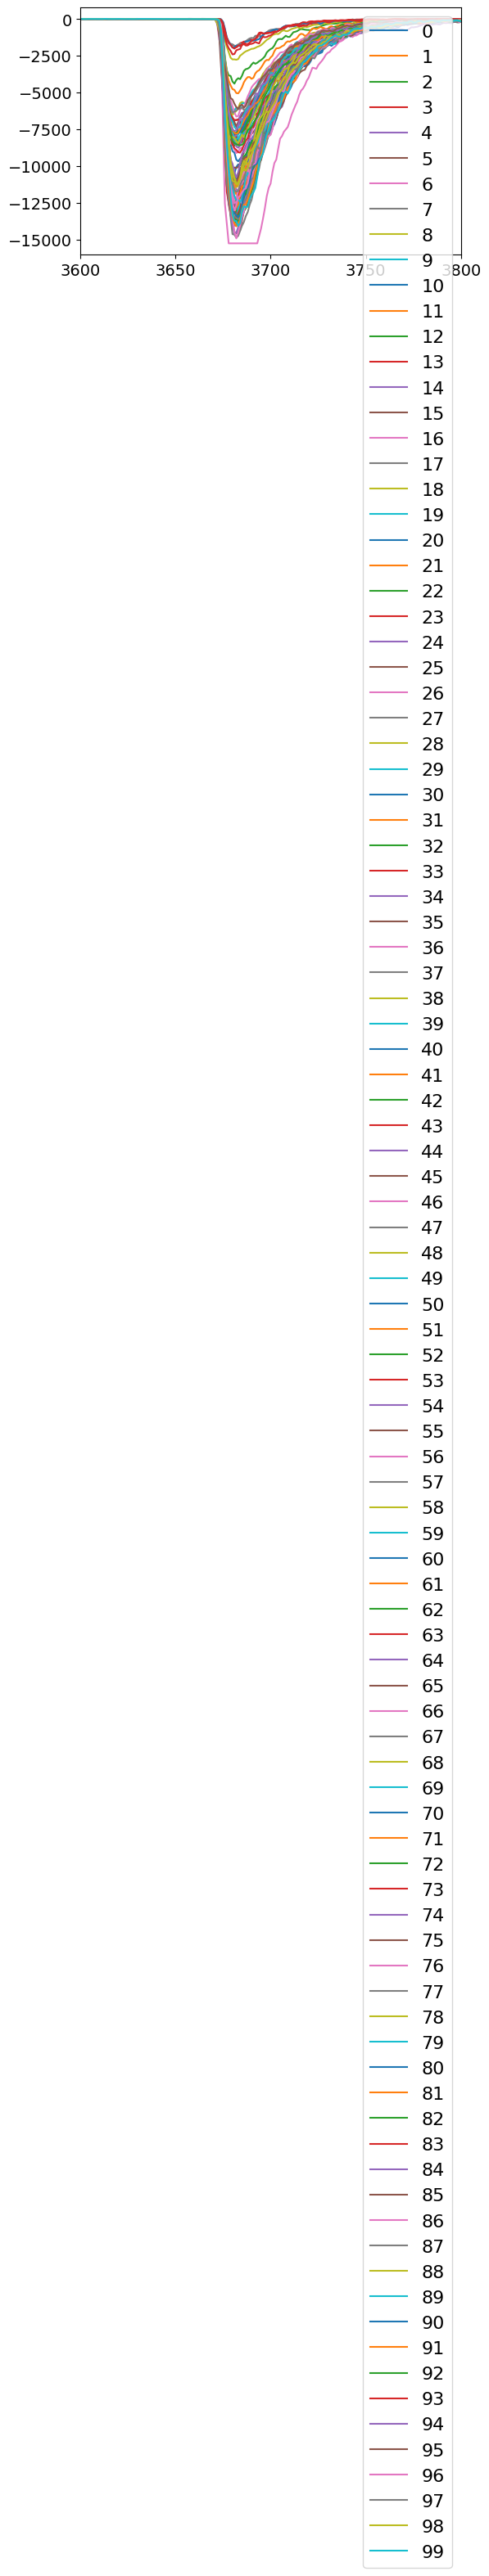

peak memory: 4507.88 MiB, increment: 0.34 MiB


In [14]:
%%memit
j = random.sample(m, 100)
tem_arr = []
for n in range(len(j)):    
    wavenum = pure.waveform_number_PS_FT[j][n]-1
#     print(pure.t0pil_Had_PS_FT[j][n]*fs,  pure.amppil_Had_PS_FT[j][n],   pure.chi2pil_Had_PS_FT[j][n]/1e7)
#     print(pure.rundata_PS_FT[j][n].decode('utf-8'))
    if pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:20]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    elif pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'run12': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:19]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:25]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T

    try: tem_arr = np.append(tem_arr, trace_3, axis = 0)
    except: tem_arr = trace_3
#     print(tem_arr.shape)
amp, t0, chi2 = OF_calct0(signal = tem_arr, 
                    template_norm = TemplateEM_p, 
                    psd_noise =np.load('./saved_outputs/psd_noise_pure.npy')[1], 
                    fs=1/2e-9,  
                    recordlength=15000)
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
    plt.xlim(3600,3800)
plt.show()
for i in range(len(tem_arr)):  
    tem_arr[i] = np.roll(tem_arr[i], int(t0[i]*1/2e-9)*-1)
    
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
    plt.xlim(3600,3800)
plt.legend()
plt.show()

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0


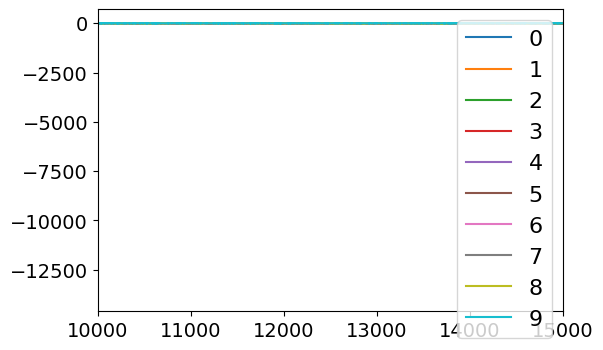

10


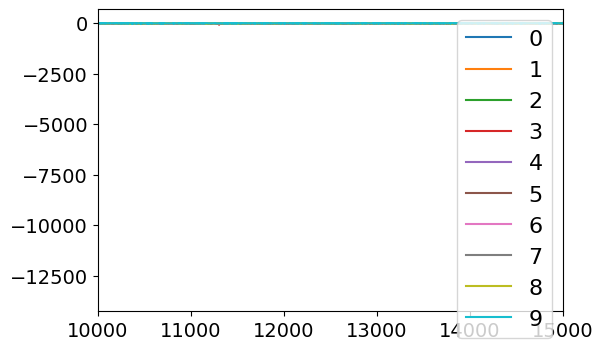

20


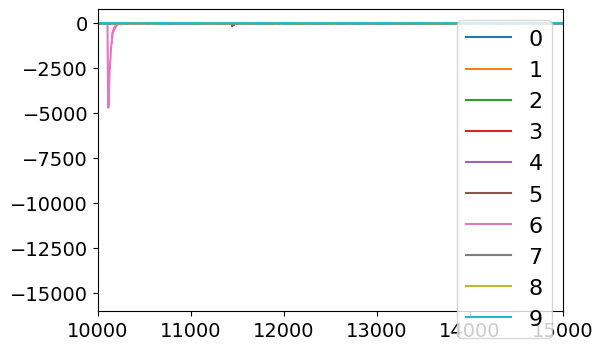

30


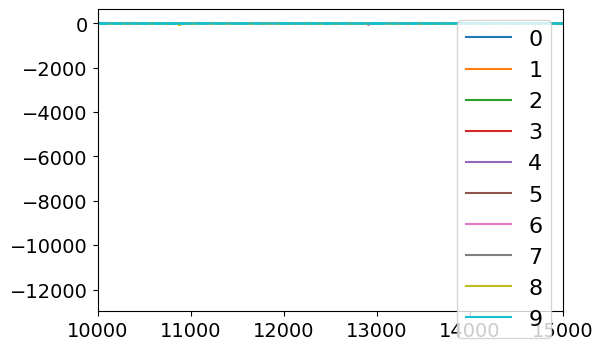

40


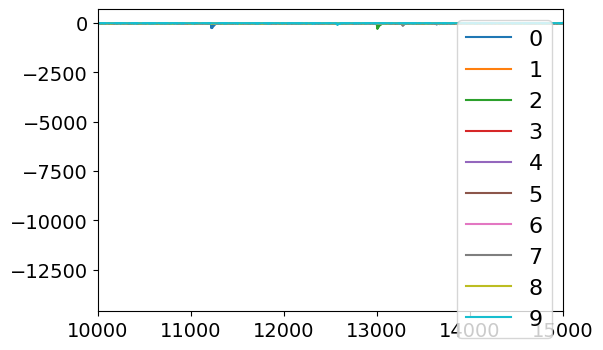

50


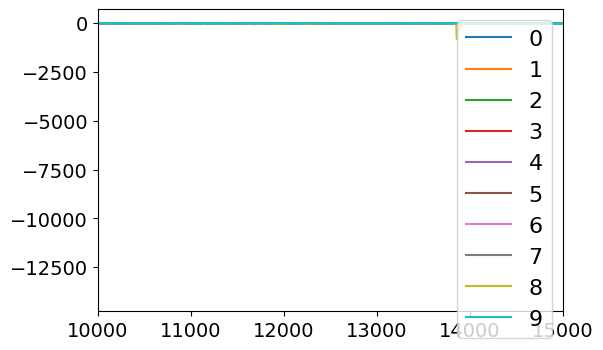

60


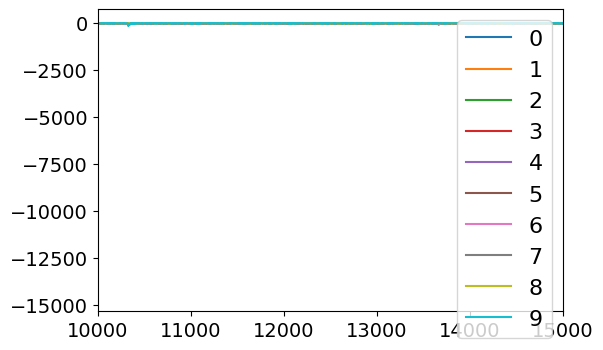

70


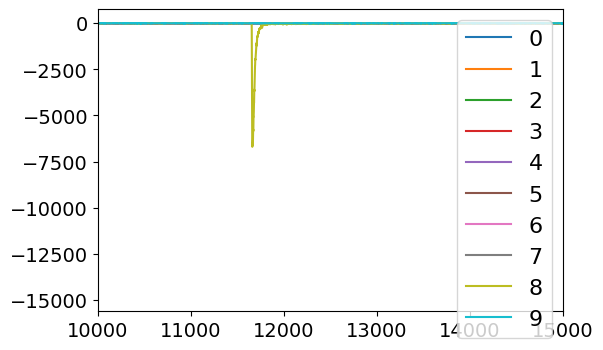

80


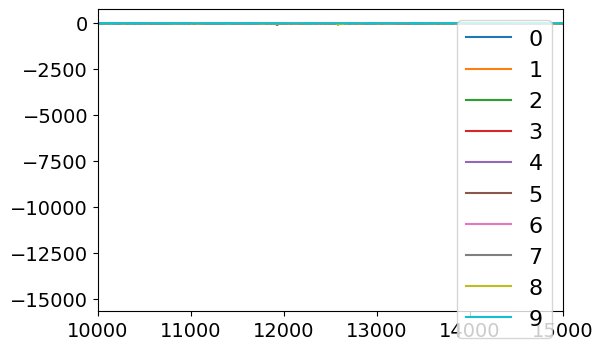

90


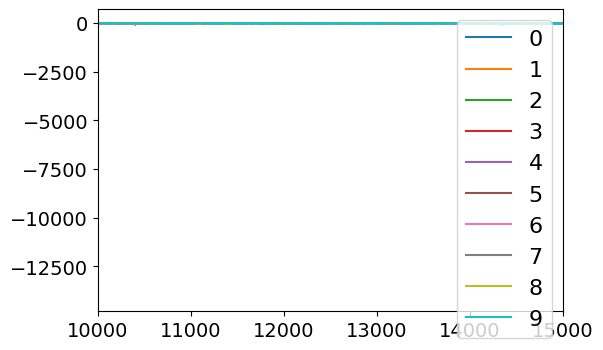

In [29]:
for n in np.arange(0,100,10):
    print(n)
    for i, x in enumerate(tem_arr[n:n+10]):
        plt.plot(range(15000), x, label = i)
        plt.xlim(10000,15000)
        plt.legend()
    plt.show()

In [31]:
re = [26,58,34,31,48,58,61,91,1, 7, 29, 30, 47, 83, 26, 42, 58, 78]
print(len(re), len(set(re)))

18 15


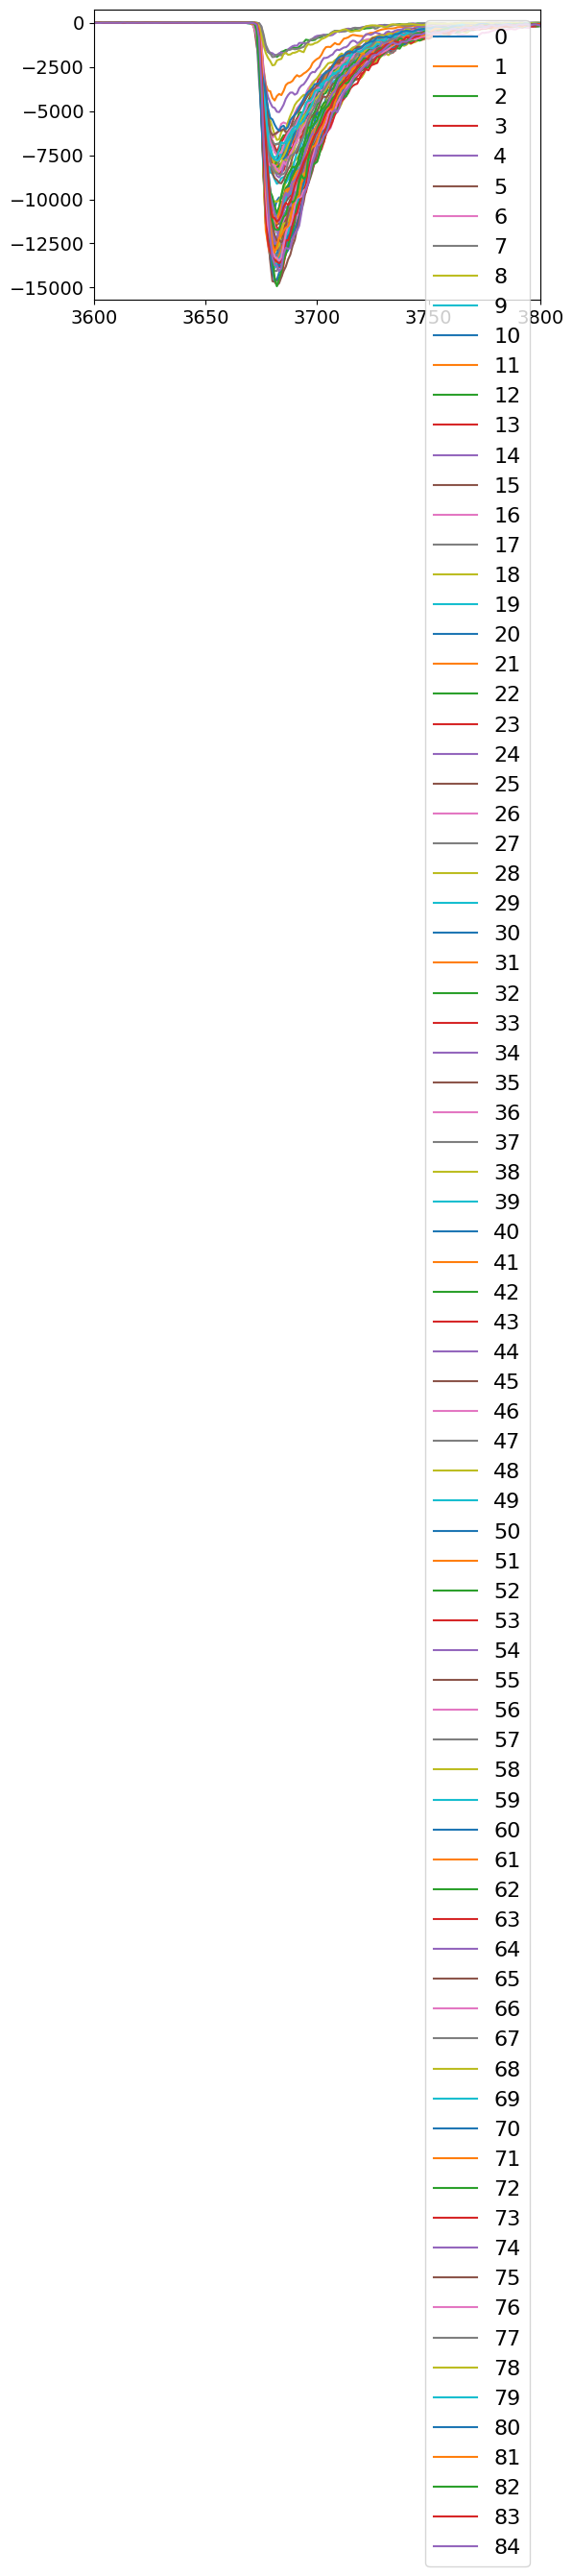

In [33]:


t = np.delete(tem_arr, list(set(re)), axis = 0)
for i, x in enumerate(t):
    plt.plot(range(15000), x, label = i)
    plt.xlim(3600,3800)
plt.legend()
plt.show()

In [44]:
np.save('templates/pure_neutron_all_amplitude_pulses_normalized.npy', tt)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
tt = t
for i, x in enumerate(tt):
    tt[i] = -x/min(x)

In [38]:
te, Te = create_template(tt)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3650.0, 3750.0)

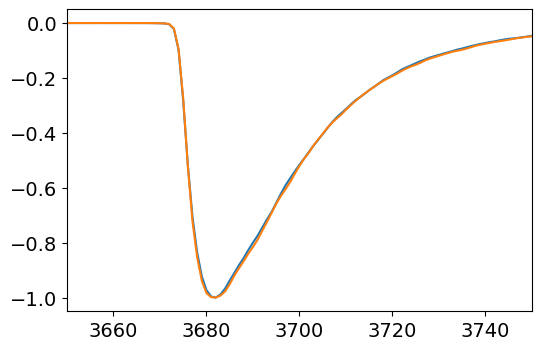

In [43]:
plt.plot(Te)
plt.plot(TemplateHAD_p)
plt.xlim(3650,3750)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3650.0, 3750.0)

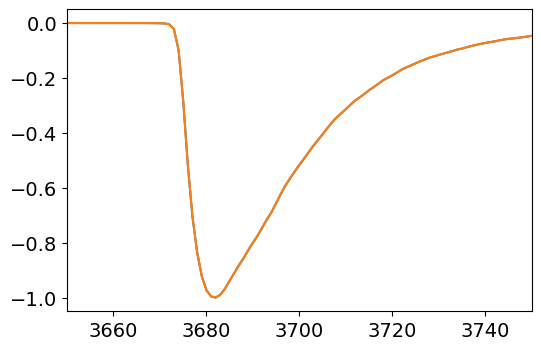

In [48]:
plt.plot(np.load('templates/pure_neutron_all_amplitude_template_normalized.npy'))
plt.plot(Te)
plt.xlim(3650,3750)